# Project 1

Student: Kesav Adithya Venkidusamy <br>
Course: DSC680 - Applied Data Science <br>
Instructor: Professor Catherine Williams <br>
Assignment: Project 1

## IBM HR Analytics and Prediction of Employee Attrition

<b>Idea</b>: Employee retention strategies are integral to the success and well-being of a company. There are often many reasons why employees leave an organization, and in this case study, I will explore some of the key drivers of employee attrition. Employee attrition measures how many workers have left an organization and is a common metric companies use to assess their performance.

While turnover rates vary from industry to industry, the Bureau of Labor Statistics reported that among voluntary separations the overall turnover rate was 32.7% in 2021, and even more than this in 2022. So, predictive attrition model helps in not only taking preventive measures but also into making better hiring decisions. Minimizing attrition can ensure associates stay longer, enabling them to continue benefiting the organization operations.

<b>Dataset</b>
The dataset is extracted from the following Kaggle website. This is a fictional dataset created by IBM data scientists. The dataset contains approximately 1500 entries.
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

This dataset presents an employee survey from IBM, indicating if there is attrition or not. Using this dataset, I will uncover the factors that lead to employee attrition and explore some of factors contribute to the attritions. 

<b>Abstract</b>: Predict the key drivers for the employee prediction

#### Features and Target present in the dataset

1. Age - Age of the person
2. BusinessTravel - How frequently the person travels
3. DailyRate - Daily Rate for the employee
4. Department - Department of the person
5. DistanceFromHome	- Distance of the company from home
6. Education - Education of the person
    1 'Below College'
    2 'College'
    3 'Bachelor'
    4 'Master'
    5 'Doctor'
7. EducationField	Education field of the person
8. EmployeeCount	Count of Employee
9. EmployeeNumber	Employee id of the person
10. EnvironmentSatisfaction	Environment Satisfaction
    1 'Low'
    2 'Medium'
    3 'High'
    4 'Very High'
11. Gender	Gender
12. HourlyRate - Hourly rate for the employee
13. JobInvolvement - Involvement in job
    1 'Low'
    2 'Medium'
    3 'High'
    4 'Very High'
14. JobLevel - Job Level
15. JobRole	- Job Role
16. JobSatisfaction	- Job Satisfaction
    1 'Low'
    2 'Medium'
    3 'High'
    4 'Very High'
17. MaritalStatus - Marital Status of Employee
18. MonthlyIncome - Monthly Income of the person
19. MonthlyRate - Monthly Rate
20. NumCompaniesWorked - Number of Companies worked
21. Over18 - Over 18 years
22. OverTime - Worked over time
23. PercentSalaryHike - Percentage of Salary Hike
24. PerformanceRating - Performance Rating
    1 'Low'
    2 'Good'
    3 'Excellent'
    4 'Outstanding'
25. RelationshipSatisfaction - Relationship Satisfaction for the employee
    1 'Low'
    2 'Medium'
    3 'High'
    4 'Very High
26. StandardHours - Standard work hours
27. StockOptionLevel - Stock Option Level given to the employee
28. TotalWorkingYears - Total Number of years worked
29. TrainingTimesLastYear - Training times attended during last year
30. WorkLifeBalance	- Work Life Balance
    1 'Bad'
    2 'Good'
    3 'Better'
    4 'Best'
31. YearsAtCompany - Number of years with current company
32. YearsInCurrentRole - Number of years in the current role
33. YearsSinceLastPromotion - Number of years since last promotion
34. YearsWithCurrManager - Number of years with current manager


Target:

Attrition — The target variable, which predicts if the employee has left the company or not.

### Data Exploration

##### Importing libraries for data processing

In [53]:
#GENERAL
import pandas as pd
import numpy as np

#VISUALIZATIONS
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#FEATURE EGNGG
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#MODEL
## Importing lib required for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#MODEL SCORES
from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report

#FEATURE IMPORTANCE
from sklearn.inspection import permutation_importance

#General
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
import plotly.io as pio
pio.renderers.default='notebook+pdf'
from IPython.display import Image

##### Source Data Analysis

In [54]:
## Reading input data and create dataframe
hr_raw_df = pd.read_csv('HR-Employee-Attrition.csv')

In [55]:
## Showing few records from the dataframe using head command
hr_raw_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [56]:
## showing the shape of the dataframe
hr_raw_df.shape

(1470, 35)

In [57]:
## Showing the info of the dataframe
hr_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [58]:
## Describe the numerical columns present in the dataframe
hr_raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


##### Observation

- The age column has a range of 18 to 60.

- The DailyRate column has a minimum value of 102 dollars and maximum value of 1499 dollars

- The distance from home number has a range of 1 to 5

- The education variable has a range of 1 to 5

- The Employee Satisfaction has 4 different values 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

- Hourly rate ranges from 30 dollars to 100 dollars.

- JobInvolvement, JobSatifaction, worklifebalance and relationship variables have 4 different values - > Involvement in job 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

- Job level has a range of 1 to 5

- Monthly income and rate are continous variable with range from 1009 dollars to 20000 dollars and 2094 dollars to 27000 dollars respectively.

- NumCompaniesWorked has a range of 1 to 9

- PercentSalaryHike ranges between 11 to 25 percentage

- PerformanceRating has 4 different values -> 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

- StandardHours has only one value which is 80

- TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager are the continuous variables based on the work experience of the employee

In [59]:
## Analyzing the target variable
hr_raw_df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

#### Observation

The Attrition column is our target variable with 2 values — ‘No’ and ‘Yes’. The count of these values is 1233 and 237 respectively, suggesting that people left the company are significantly less compared to people who are continuing their service in the company, and our data set is imbalanced considering the target variable.

In [60]:
## Identifying the numerical columns in the dataset
num_cols = hr_raw_df.select_dtypes('int64' ,'float64').columns
print(num_cols)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [61]:
## Identifying categorical variables in the dataset
cat_cols = hr_raw_df.select_dtypes('object').columns
cat_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

## EDA

In [62]:
## Analyzing all the categorical variables;
## Printing all the unique values of the categorical variables
## Summary of categorical variables
cat_cols=hr_raw_df.select_dtypes(include=object).columns.tolist()
cat_df=pd.DataFrame(hr_raw_df[cat_cols].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(hr_raw_df.select_dtypes(include=object).describe())
display(cat_df)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


count
column         value                           
Attrition      Yes                          237
               No                          1233
BusinessTravel Non-Travel                   150
               Travel_Frequently            277
               Travel_Rarely               1043
Department     Human Resources               63
               Sales                        446
               Research & Development       961
EducationField Human Resources               27
               Other                         82
               Technical Degree             132
               Marketing                    159
               Medical                      464
               Life Sciences                606
Gender         Female                       588
               Male                         882
JobRole        Human Resources               52
               Research Director             80
               Sales Representative          83
               Manager                      102
               Healthcare Representative    131
               Manufacturing Director       145
               Laboratory Technician        259
               Research Scientist           292
               Sales Executive              326
MaritalStatus  Divorced                     327
               Single                       470
               Married                      673
Over18         Y                           1470
OverTime       Yes                          416
               No                          1054

In [63]:
## Printing unique value count for all the variables
print("All columns Unique values count")
for col in hr_raw_df:
    print(col, len(hr_raw_df[col].unique()), sep=': ')

All columns Unique values count
Age: 43
Attrition: 2
BusinessTravel: 3
DailyRate: 886
Department: 3
DistanceFromHome: 29
Education: 5
EducationField: 6
EmployeeCount: 1
EmployeeNumber: 1470
EnvironmentSatisfaction: 4
Gender: 2
HourlyRate: 71
JobInvolvement: 4
JobLevel: 5
JobRole: 9
JobSatisfaction: 4
MaritalStatus: 3
MonthlyIncome: 1349
MonthlyRate: 1427
NumCompaniesWorked: 10
Over18: 1
OverTime: 2
PercentSalaryHike: 15
PerformanceRating: 2
RelationshipSatisfaction: 4
StandardHours: 1
StockOptionLevel: 4
TotalWorkingYears: 40
TrainingTimesLastYear: 7
WorkLifeBalance: 4
YearsAtCompany: 37
YearsInCurrentRole: 19
YearsSinceLastPromotion: 16
YearsWithCurrManager: 18


#### Null Values

In [64]:
## Printing list of null values present in each column
hr_raw_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##### Observation

There is no null values present in the dataset

#### Duplicate check

In [65]:
# Selecting duplicate rows
# occurrence based on all columns
duplicate = hr_raw_df[hr_raw_df.duplicated()]
duplicate

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


###### Observation

There is no duplicate value present in the dataframe

#### Python Profiling report

In [66]:
# from pandas_profiling import ProfileReport
# profile=ProfileReport(hr_raw_df)
# profile.to_notebook_iframe()

#### Dropping unwanted variables

Based on Profile report shown above, the below variables have only one constant value and can be removed from the dataset.

1. EmployeeCount - constant value "1"
2. StandardHours - constant value "80"
3. Over18 - constant value "True"
4. EmployeeNumber - Employee number is key column which can also be removed
5. StockOptionLevel - I believe this is stock options given to the employees having values between 1 to 3; So, this column can also been removed.

In [67]:
## Copying the dataframe to another dataframe 
hr_df = hr_raw_df.copy(deep=True)

In [68]:
hr_df.drop(columns=["EmployeeCount","StandardHours","Over18","EmployeeNumber","StockOptionLevel"],inplace=True)
hr_df.shape

(1470, 30)

In [69]:
## Showing the list of fields present in the dataframe
hr_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Visualizations

#### Numerical Variable Exploration

#### Histogram

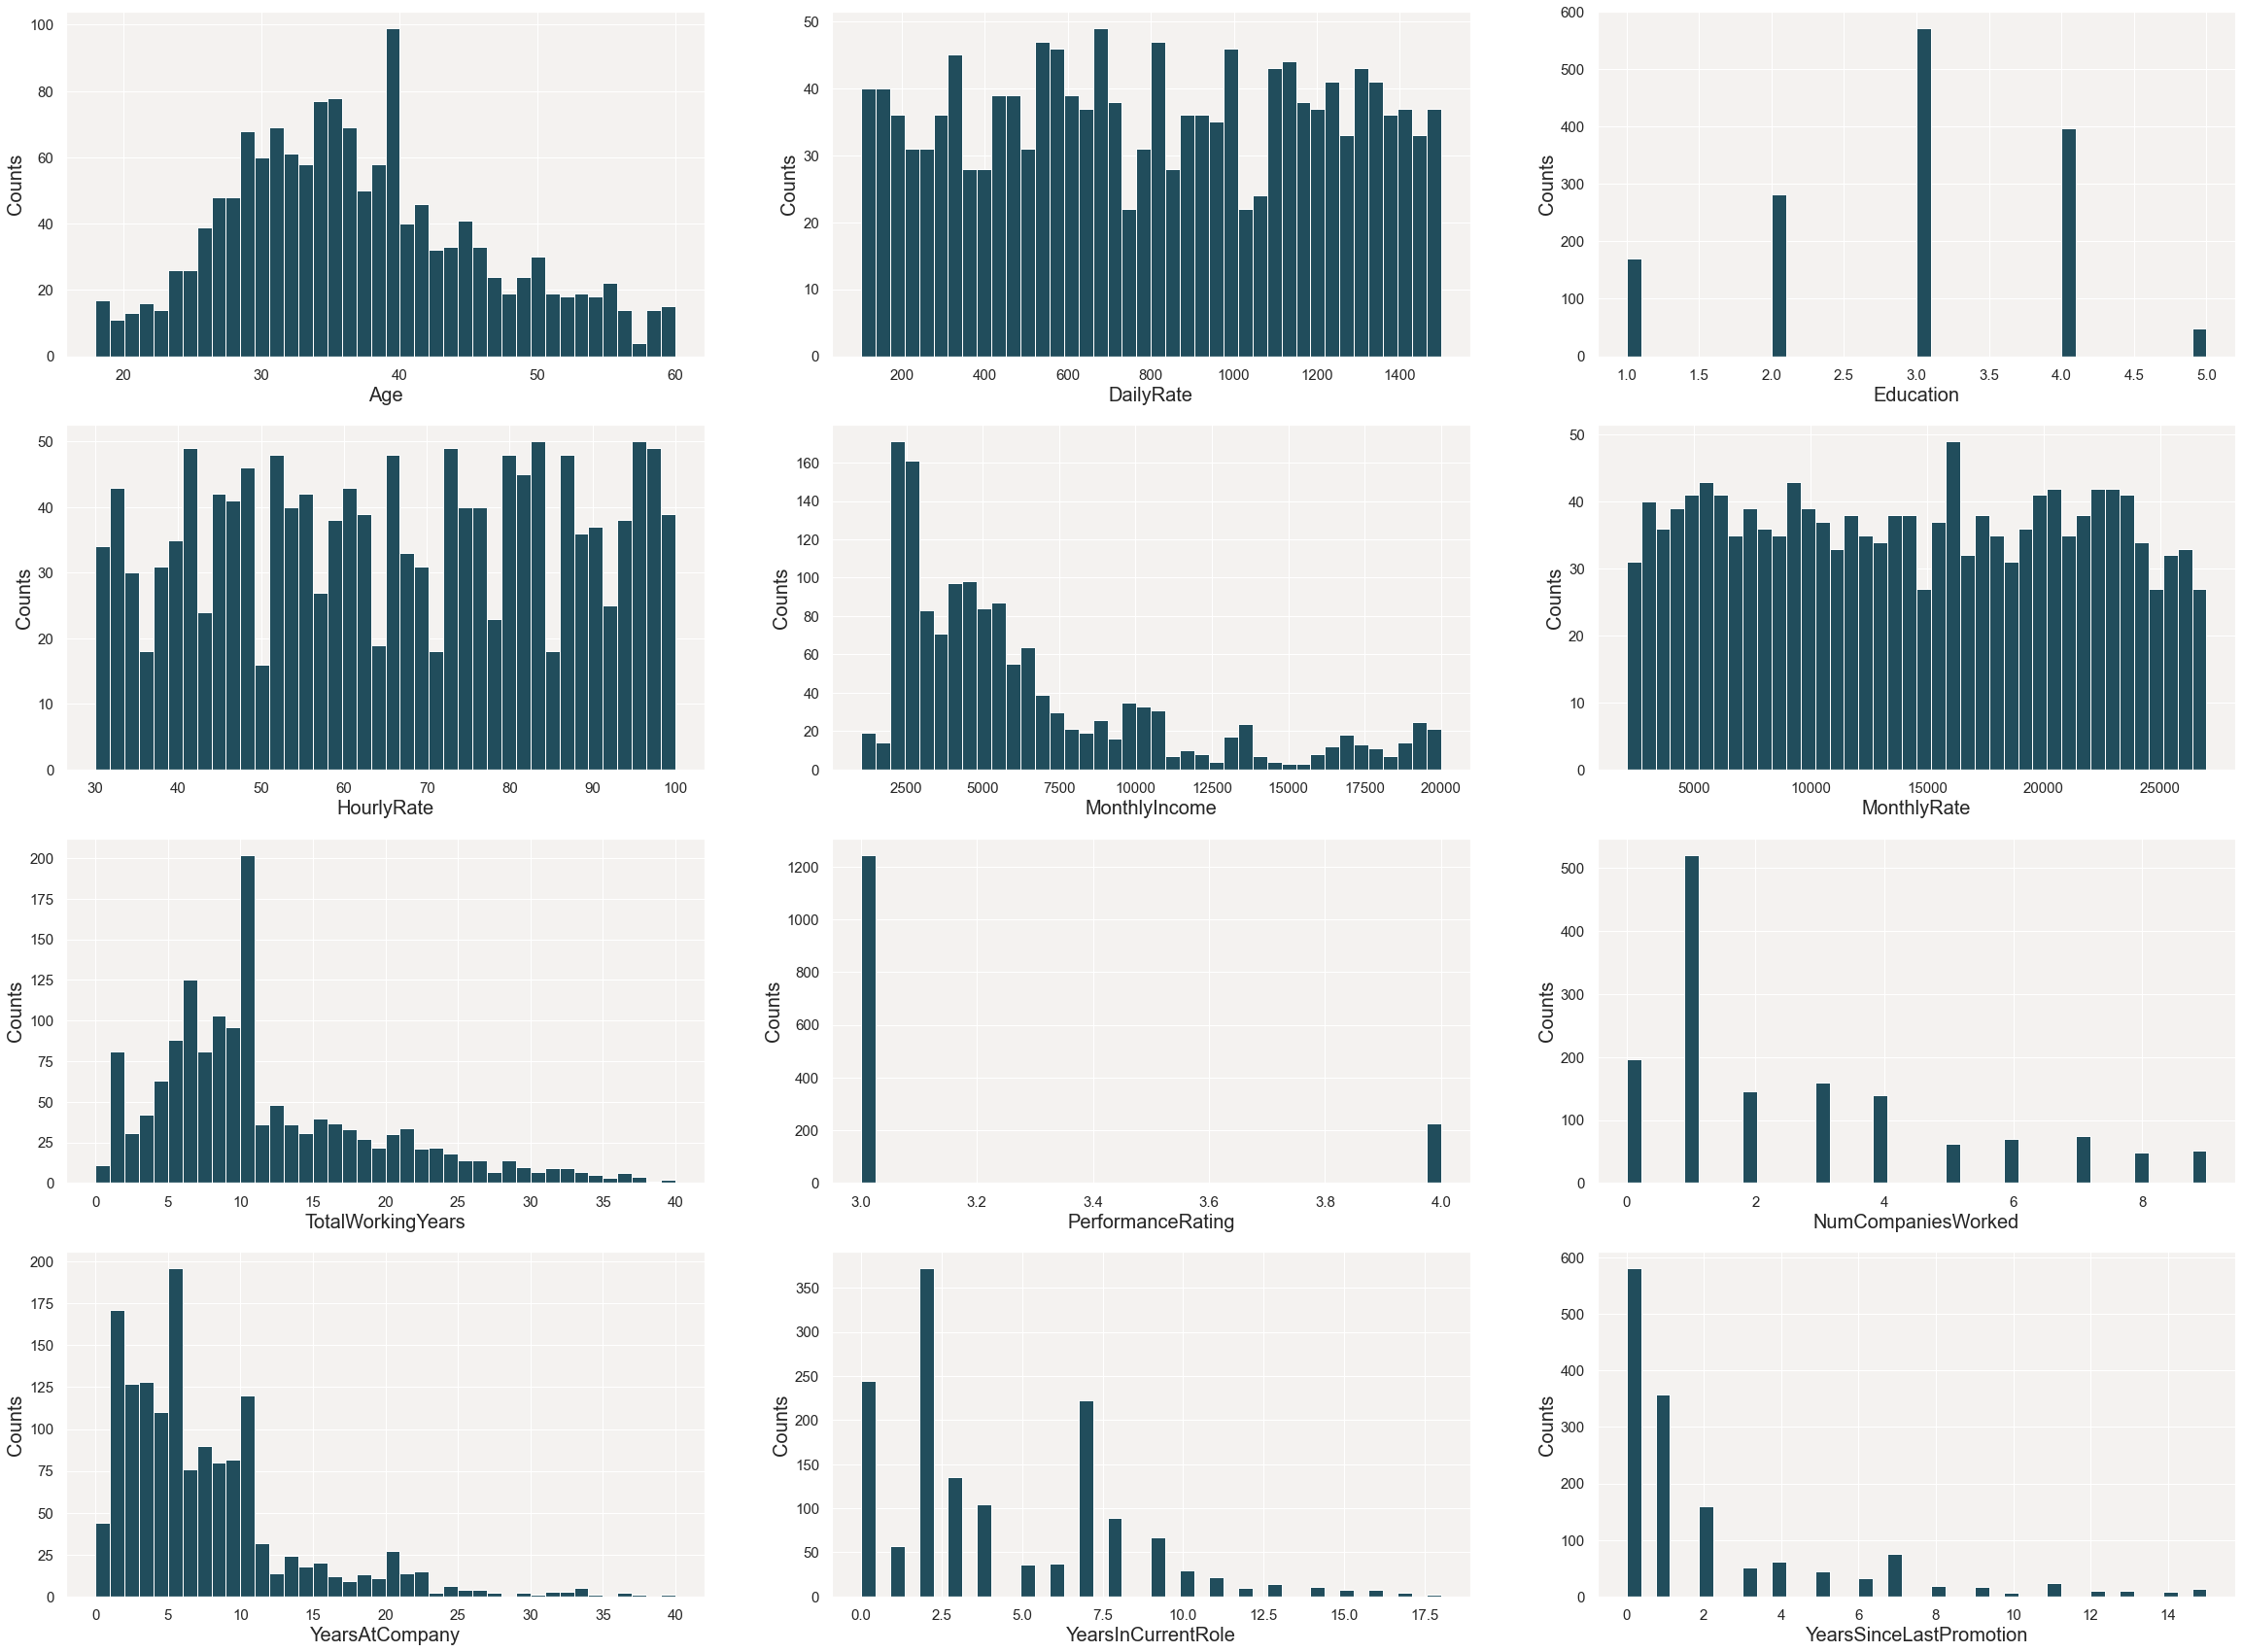

In [70]:
## Make some histograms of your data
## Specify the features of interest
features = ['Age','DailyRate','Education','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','PerformanceRating','NumCompaniesWorked','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion']
xaxes = features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts','Counts','Counts','Counts','Counts','Counts','Counts']
# set up the figure size
plt.rcParams['figure.figsize'] = (40, 30)
# make subplots
fig, axes = plt.subplots(nrows = 4, ncols = 3)
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(hr_df[features[idx]].dropna(), bins=40, color='#214D5C')
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

###### Observation

1. <b>Age and Education</b>: From the histogram, we observe that these features are nearly normalized, with majority of the values occur at the middle (ages falling in the 40-50 and 3 for education). The count is low at the beginning and end making the shape as "bell".
2. <b>DailyRate, HourlyRate, MonthlyRate</b>: All these features are uniform where every value in a dataset occurs roughly the same number of times. This type of histogram often looks like a rectangle with no clear peaks.
3. <b>PerformanceRating</b>: Only 2 values are present for this feature with maximum at 3 and minimum at 4.
4. <b>YearsAtCompany, YearsSinceLastPromotion, YearsInCurrentRole, MonthlyIncome</b>: All these features are right-skewed as they have a “tail” on the right side of the distribution. The frequency of occurence of values is high at at the beginning and low towards the end. 
5. <b>NumCompaniesWorked, TotalWorkingYears</b>: These features are also kind of right skewed. However, the peak occurred at the middle (1 for NumCompaniesWorked and 10 for TotalWorkingYears)

#### Categorical Variable Exploration

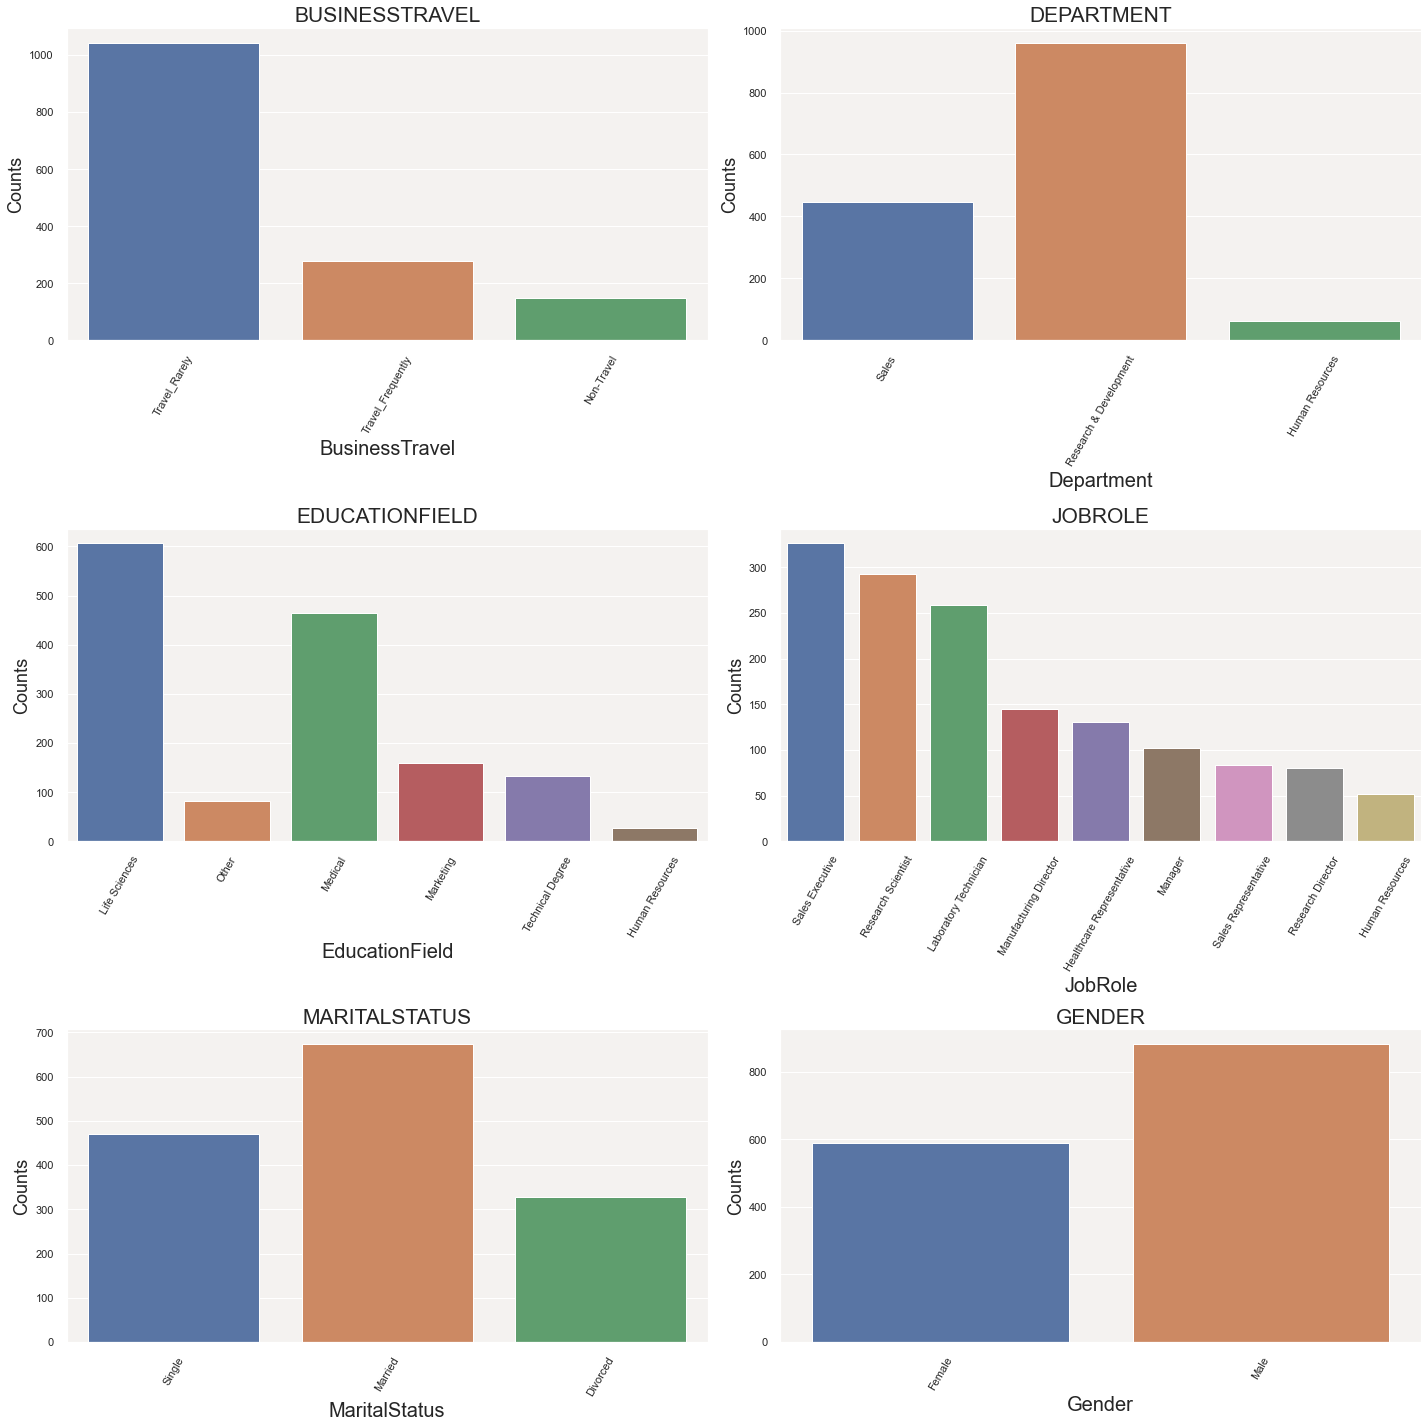

In [71]:
features = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus','Gender']
fig = plt.figure()

for i, col in enumerate(features):
    fig.add_subplot(3,2, i + 1)
    fig.set_figheight(20)
    fig.set_figwidth(20)
    title = col.upper()
    p = sns.countplot(hr_df[col])
    p.set_title(title, fontsize = 21)
    p.set_ylabel('Counts', fontsize = 18)
    p.set_xlabel(col, fontsize = 20)
    plot = plt.xticks(rotation = 60)
fig.tight_layout()

##### Observation

1. BusinessTravel - There are 3 unique values present for this feature with more number of records (> 1000) for "Travel_Rarely" and slightly greater than 200 for Travel_Frequently and slightly less than 200 for Non-Travel.
2. Department - This feature has 3 unique values with more number of records for R&D Department and least number of records for HR department
3. Education - This feature has 6 different values with more people falling under Life Science and Medical and less number of people HR and Other
4. JobRole - There are many values present for this feature with more people falling under SalesExecutive, Research Scientist, Laboratory Technician and less people under the job roles sales representative, research director and HR.
5. MaritalStatus - Marital status field has 3 distinct values with most of the people falling under marries and less number of people under Divorced.
6. Gender - Final categorical variables is Gender with 2 distinct values Males and Female with more number of records for Males compared to Female.

#### Target Variable Analysis

#### Bar & Pie Charts

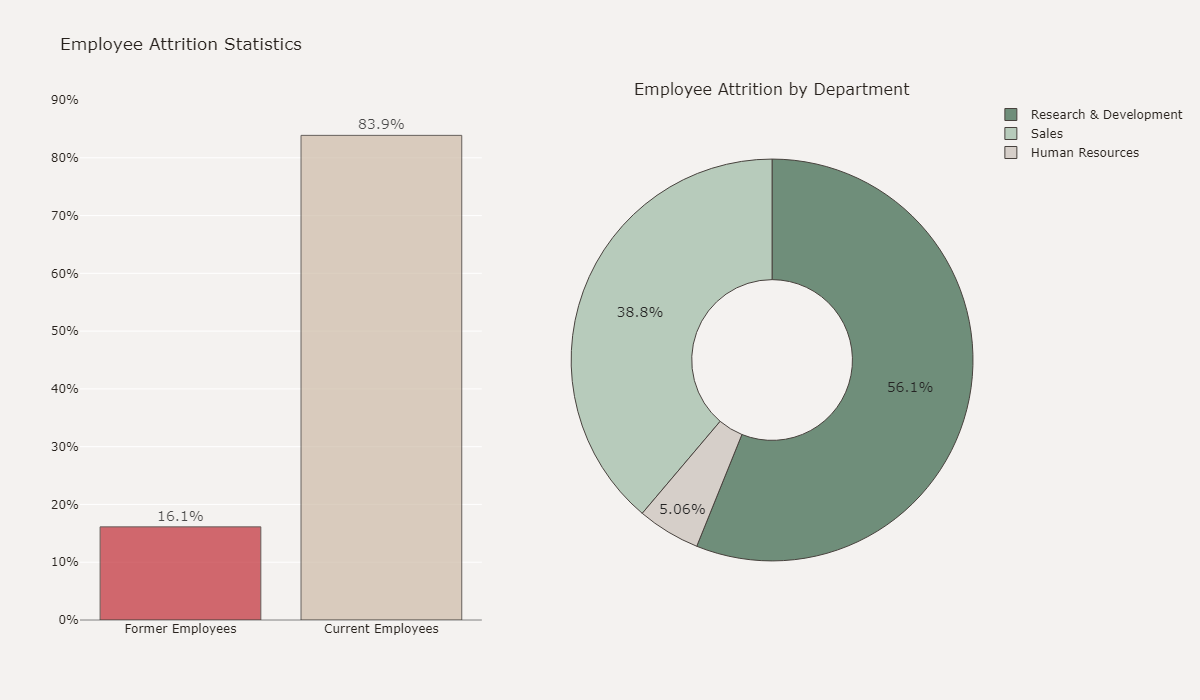

In [72]:
# Bar & Pie chart
fig=make_subplots(rows=1, cols=2, 
                  subplot_titles=("", "Employee Attrition by Department"),
                  specs=[[{"type": "bar"}, {"type": "pie"}]])

# Bar chart
plot_df=hr_df['Attrition'].value_counts(normalize=True)
plot_df=plot_df.mul(100).rename('Percent').reset_index().sort_values('Percent')
plot_df.rename(columns={'index':'Attrition'}, inplace=True)
plot_df['Attrition']=['Former Employees' if i == 'Yes' else 'Current Employees' for i in plot_df['Attrition']]
x=plot_df['Attrition']
y=plot_df['Percent']
fig.add_trace(
    go.Bar(x=x, y=y, text=y,opacity=.7,
           hovertemplate='Employee Attrition Rate<br>%{x}: %{y:.3}%<extra></extra>',
           showlegend=False), row=1, col=1)
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside', 
                  marker_line=dict(width=1, color='#1F0202'), marker_color=['#C02B34','#CDBBA7'])
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='gray')
fig.update_layout(yaxis_ticksuffix = '%')

# Pie chart
plot_df2=hr_df[hr_df.Attrition=='Yes']
plot_df2=plot_df2['Department'].value_counts(normalize=True)
plot_df2=plot_df2.mul(100).rename('Percent').reset_index().sort_values('Percent', ascending=False)
plot_df2.rename(columns={'index':'Department'}, inplace=True)
fig.add_trace(go.Pie(labels=plot_df2['Department'], values=plot_df2['Percent'], opacity=0.85, hole=0.4,
                     hovertemplate='%{label}<br>Attrition Rate: %{value:.3}%<extra></extra>',
                     marker_colors=['#587D65','#ADC4B2','#D1C9C2']), row=1, col=2)
fig.update_yaxes(tickmode = 'array', range=[0, 90], dtick=5)
fig.update_traces(textfont_size=14,textfont_color='black',marker=dict(line=dict(color='#28221D', width=1)))
fig.update_layout(title_text="Employee Attrition Statistics", font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')      
#fig.show()
image_bytes = fig.to_image(format='png', width=1200, height=700, scale=1) # you can use other formats as well (like 'svg','jpeg','pdf')
Image(image_bytes)

###### Observation

The above visualization shows Employee attrition statistics and Employee Attrition by Department. Among entire dataset, around 16% of employees left the company and remaining are continuing in their job

Among those left the companies (former employees), over half worked in Research & Development, while only 5% were from Human Resources and 38.8% in Sales department.

I also observe a very high data imbalance in target variable as employees left the company is contributing only 16% whereas employees working in the organization is ~84%; Some Sampling technique has to be used to balance the data 

##### Attrition Rate by Department and Gender

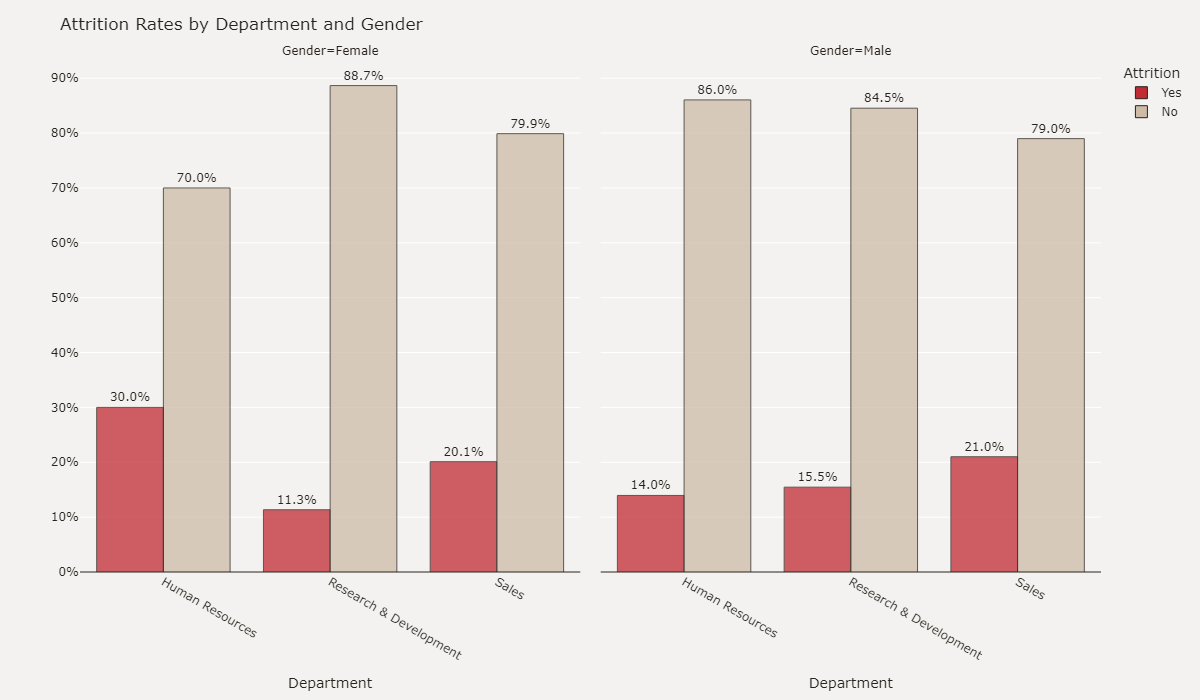

In [73]:
## Bar Graph showing the Attrition rates by department and Gender

plot_df = hr_df.groupby(['Gender','Department'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()
fig = px.bar(plot_df, x="Department", y="Percent", color="Attrition", barmode="group",
            text='Percent', opacity=.75, facet_col="Gender", category_orders={'Attrition': ['Yes', 'No']},
            color_discrete_map={'Yes': '#C02B34','No': '#CDBBA7'}) 
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'),  width=.4)
fig.update_layout(title_text='Attrition Rates by Department and Gender', yaxis_ticksuffix = '%',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',font_color='#28221D',
                  height=500, xaxis=dict(tickangle=30))
fig.update_xaxes(showticklabels=True,tickangle=30,col=2)
fig.update_yaxes(title = "", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
#fig.show()
image_bytes = fig.to_image(format='png', width=1200, height=700, scale=1) # you can use other formats as well (like 'svg','jpeg','pdf')
Image(image_bytes)

##### Observation

Women in Human Resources experienced the highest amount of turnover, with nearly 1 out of every 3 women in HR leaving the company. Sales department comes 2nd with turnover rate of 21% and Research & Development comes third with a rate of 11.3%. 

For men, the highest turnover occurred in the Sales department with nearly 21%. The remaining departments Research and Development and HR are more or less experiencing similar rate of attrition (~15%).

##### Attrition rate by Work life balance and Gender

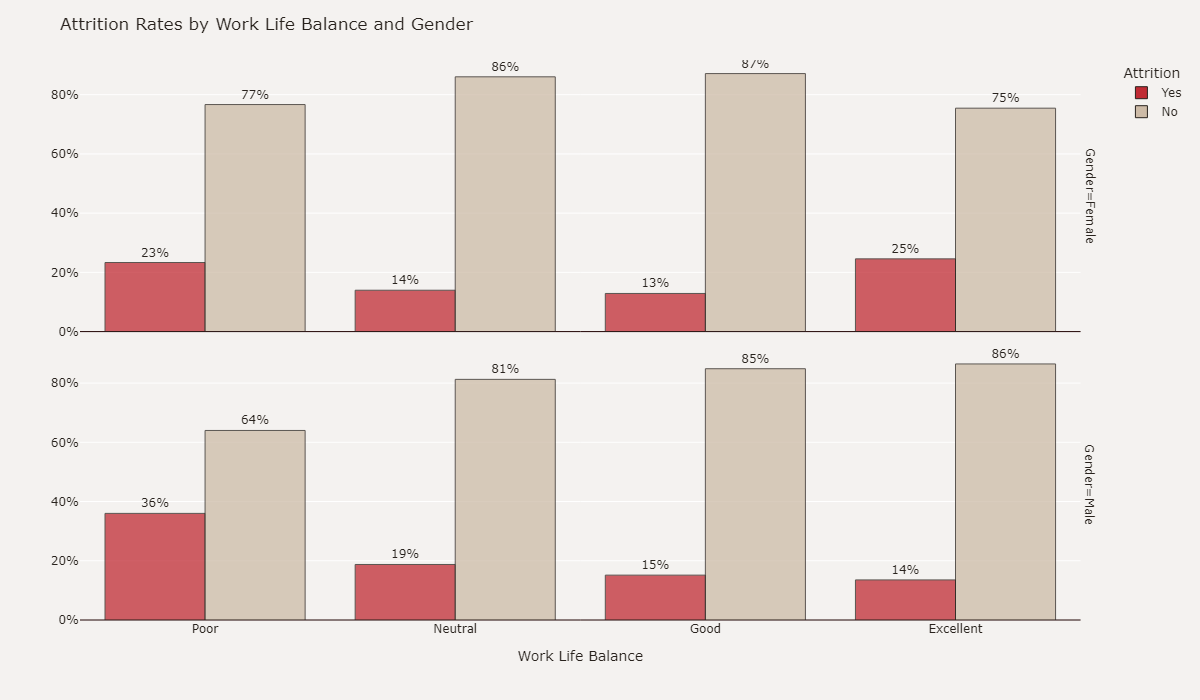

In [74]:
plot_df = hr_df.groupby(['WorkLifeBalance','Gender'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()
fig = px.bar(plot_df, x='WorkLifeBalance', y='Percent', color='Attrition',
             facet_row='Gender', text='Percent', opacity=0.75, barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']},
             color_discrete_map={'Yes': '#C02B34','No': '#CDBBA7'})
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside', 
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(title="",zeroline=True, zerolinewidth=1, zerolinecolor='#1F0202',ticksuffix = '%')
fig.update_layout(title_text='Attrition Rates by Work Life Balance and Gender',height=750,font_color='#28221D',
                  xaxis_title='Work Life Balance', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', 
                  xaxis = dict(tickmode = 'array', tickvals = [1, 2, 3, 4],
                               ticktext = ['Poor', 'Neutral', 'Good', 'Excellent']))
#fig.show()
image_bytes = fig.to_image(format='png', width=1200, height=700, scale=1) # you can use other formats as well (like 'svg','jpeg','pdf')
Image(image_bytes)

##### Observation

Among women with the highest rated work life balance, 1 out of 4 left the company, the highest proportion among the ratings for women. For men, the highest proportion occurred in those with the lowest work life balance.

##### Attrition Rate by Department and Gender

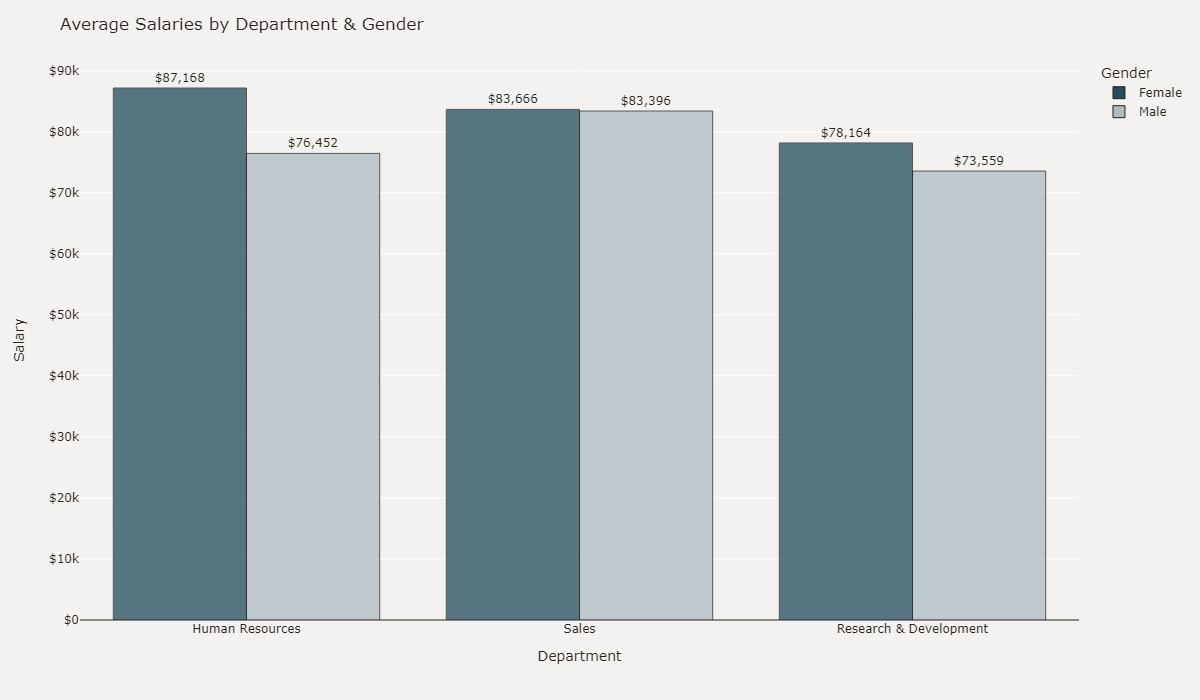

In [75]:
plot_df = hr_df.groupby(['Department', 'Gender'])['MonthlyIncome'].mean()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False)
fig = px.bar(plot_df, x='Department', y='Salary', color='Gender', text='Salary',  
             barmode='group', opacity=0.75, color_discrete_map={'Female': '#214D5C','Male': '#ACBCC2'})
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Average Salaries by Department & Gender', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$'), paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
#fig.show()
image_bytes = fig.to_image(format='png', width=1200, height=700, scale=1) # you can use other formats as well (like 'svg','jpeg','pdf')
Image(image_bytes)

##### Observation

Across each department, the average salary for women have higher salaries than men.

##### Median Salary by Department and Attrition Status

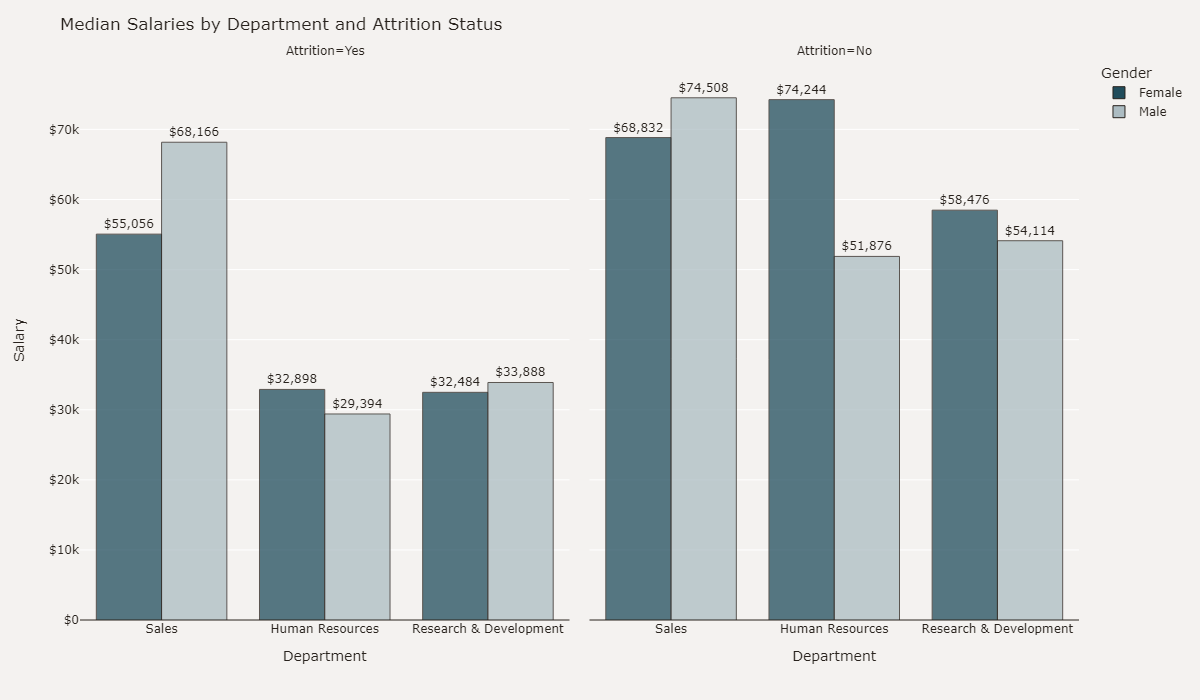

In [76]:
## Bar Graph to show median salary by Department with Attrition Status
plot_df = hr_df.groupby(['Department', 'Attrition', 'Gender'])['MonthlyIncome'].median()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False).sort_values('Gender')
fig = px.bar(plot_df, x='Department', y='Salary', color='Gender', text='Salary',  
             barmode='group', opacity=0.75, color_discrete_map={'Female': '#214D5C','Male': '#ACBCC2'},
             facet_col='Attrition', category_orders={'Attrition': ['Yes', 'No']})
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Median Salaries by Department and Attrition Status', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$',range=(0,79900)),width=950,height=500,
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
#fig.show()
image_bytes = fig.to_image(format='png', width=1200, height=700, scale=1) # you can use other formats as well (like 'svg','jpeg','pdf')
Image(image_bytes)

###### Observation

In comparison to current employees, former employees had lower median salaries across all three departments. In Human Resources and Research and Development departments, women tend to have higher median salaries than men.

##### Attrition Rates by Job Satisfaction, Environment Satisfaction, Job Involvement and Performance Rating 

Text(0.5, 1.0, 'Attrition Rate by Performance Rating')

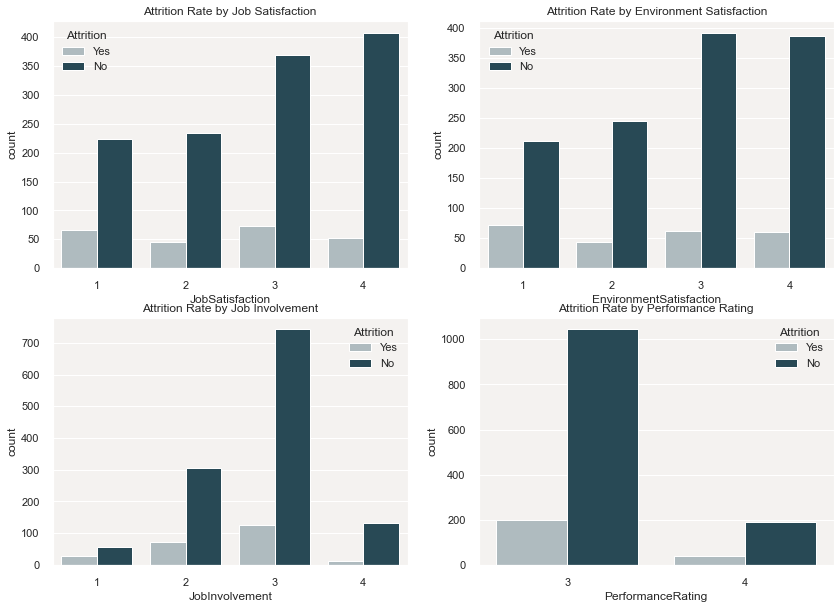

In [77]:
## Bar Chart comparison
plt.figure(figsize =(14 ,10))
sns.set(rc={'axes.facecolor':'#F4F2F0','figure.facecolor':'#FFFFFF'})
plt.subplot(2,2,1)
sns.countplot(hr_df['JobSatisfaction'] ,hue =hr_df['Attrition'] ,palette={'#214D5C','#ACBCC2'}).set_title("Attrition Rate by Job Satisfaction")
plt.subplot(2,2,2)
sns.countplot(hr_df['EnvironmentSatisfaction'] ,hue =hr_df['Attrition'] ,palette={'#214D5C','#ACBCC2'}).set_title("Attrition Rate by Environment Satisfaction")
plt.subplot(2,2,3)
sns.countplot(hr_df['JobInvolvement'] ,hue =hr_df['Attrition'] ,palette={'#214D5C','#ACBCC2'}).set_title("Attrition Rate by Job Involvement")
plt.subplot(2,2,4)
sns.countplot(hr_df['PerformanceRating'] ,hue =hr_df['Attrition'] ,palette={'#214D5C','#ACBCC2'}).set_title("Attrition Rate by Performance Rating")

#### Box Plot

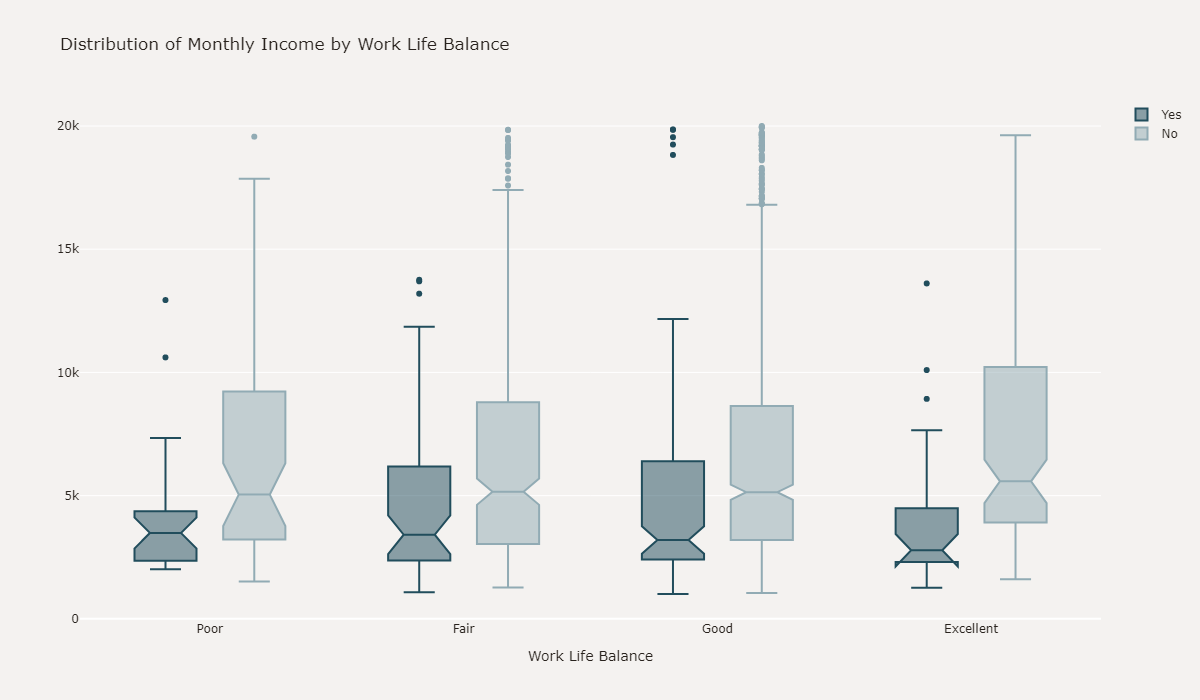

In [78]:
## Box Plot to show Monthly Income by Work Life Balance for Attrition
fig=go.Figure()
colors=['#214D5C','#91ABB4']
for i, j in enumerate(hr_df['Attrition'].unique()):
    df_plot=hr_df[hr_df['Attrition']==j]
    fig.add_trace(go.Box(x=df_plot['WorkLifeBalance'], y=df_plot['MonthlyIncome'],
                         notched=True, line=dict(color=colors[i]),name=j))
fig.update_layout(title='Distribution of Monthly Income by Work Life Balance',
                  xaxis_title='Work Life Balance', boxmode='group', font_color='#28221D',
                  xaxis = dict(tickmode = 'array', tickvals = [1, 2, 3, 4],
                               ticktext = ['Poor', 'Fair', 'Good', 'Excellent']),
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
#fig.show()
image_bytes = fig.to_image(format='png', width=1200, height=700, scale=1) # you can use other formats as well (like 'svg','jpeg','pdf')
Image(image_bytes)

##### Observation

1. The Attrition rate is high among the people who have "Good" work life balance earning median monthly income of 3202 dollars. However, the attrition rate is less among the people who have "Excellent" work life balance earning median monthly income of 2785 dollars; The people with "Fair" work life balance comes next.

2. To a surprise, the attrition rate for the people who have "Poor" work life balance is less. We will analyze more for the reason.

3. More number of people who have "Excellent" work life balance are continuing in the company which is as expected (Attrition Rate = No);  

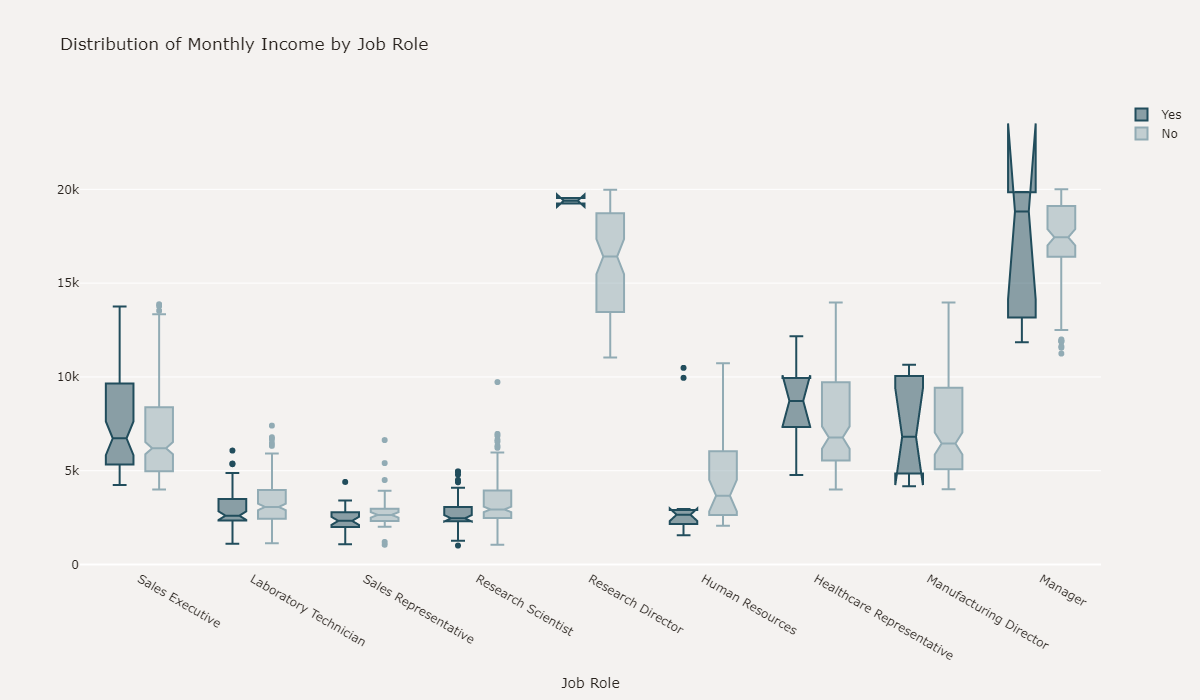

In [79]:
## Box Plot to show Monthly Income by Work Life Balance for Attrition
JobRoleUnique = hr_df['JobRole'].unique()
fig=go.Figure()
colors=['#214D5C','#91ABB4']
for i, j in enumerate(hr_df['Attrition'].unique()):
    df_plot=hr_df[hr_df['Attrition']==j]
    fig.add_trace(go.Box(x=df_plot['JobRole'], y=df_plot['MonthlyIncome'],
                         notched=True, line=dict(color=colors[i]),name=j))
fig.update_layout(title='Distribution of Monthly Income by Job Role',
                  xaxis_title='Job Role', boxmode='group', font_color='#28221D',
                  xaxis = dict(tickmode = 'array', tickvals = JobRoleUnique),
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
#fig.show()
image_bytes = fig.to_image(format='png', width=1200, height=700, scale=1) # you can use other formats as well (like 'svg','jpeg','pdf')
Image(image_bytes)

##### Observation

The attrition rate is high among "Managers", "Manufacturing Director" and "Sales Executives" whereas it is low for "Research Director" and "Sales Representative"; So, "Research Director" and "Sales Representative" are not willing to quit the company often whereas "Managers", "Manufacturing Director" and "Sales Executives" often change their companies.

#### Scatter Plot

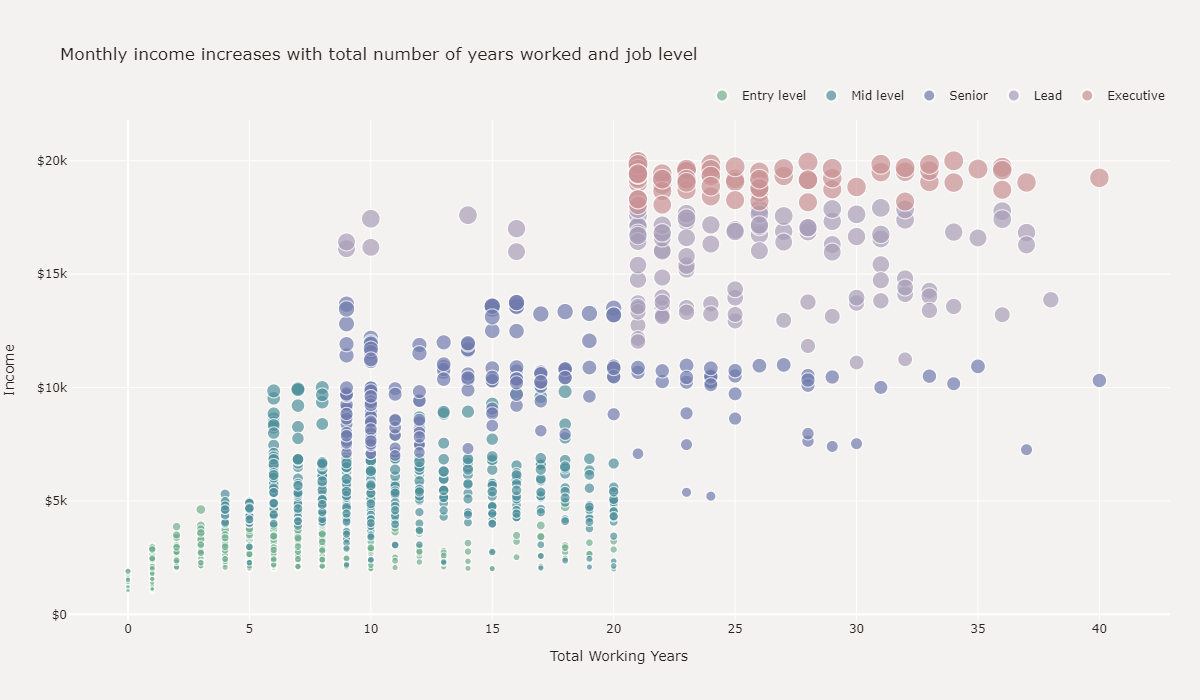

In [80]:
## Plotting scatter plot
plot_df = hr_df.copy()
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories( 
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])
col=['#73AF8E', '#4F909B', '#707BAD', '#A89DB7','#C99193']
fig = px.scatter(plot_df, x='TotalWorkingYears', y='MonthlyIncome', 
                 color='JobLevel', size='MonthlyIncome',
                 color_discrete_sequence=col, 
                 category_orders={'JobLevel': ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive']})
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  title='Monthly income increases with total number of years worked and job level <br>',
                  xaxis_title='Total Working Years', yaxis=dict(title='Income',tickprefix='$'), 
                  legend_title='', font_color='#28221D',
                  margin=dict(l=40, r=30, b=80, t=120),paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
#fig.show()
image_bytes = fig.to_image(format='png', width=1200, height=700, scale=1) # you can use other formats as well (like 'svg','jpeg','pdf')
Image(image_bytes)

##### Observation

Based on the scatterplot above, monthly income is positively correlated with total number of years worked and there is strong association between an employee's earnings and their job level.

##### Heat Map

In [81]:
## Converting the target column value to 0 and 1 for <=50K and >50K respectively
hr_df['Attrition'] = np.where(hr_df['Attrition'] == 'Yes', 1, 0)
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,6,3,3,2,2,2,2


In [82]:
##Calculating the total count for income
hr_df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Text(0.5, 1.0, 'Heat Map')

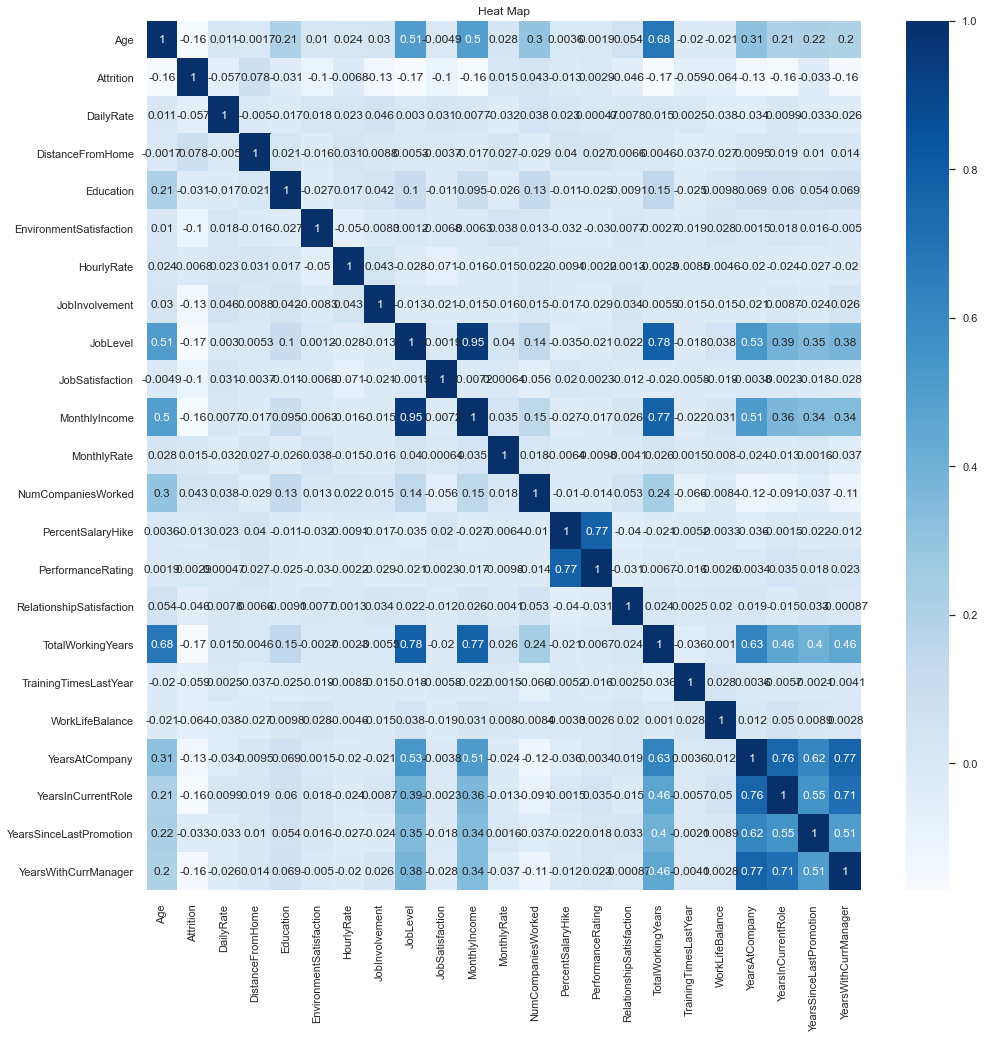

In [83]:
#create a heat map of the Pearson correlation coefficients of the numerical features
#set up the figure size
# %matplotlib inline
# plt.rcParams['figure.figsize'] = (16, 16)

# #heat_map_features = ['age', 'fnlwgt', 'educational-num', 'hours-per-week', 'capital-gain','capital-loss','income']

# # import the package for visulization of the correlation
# from yellowbrick.features import Rank2D

# # extract the numpy arrays from the data frame
# X = income_df[heat_map_features].values

# # instantiate the visualizer 
# heat_map = Rank2D(features=heat_map_features, algorithm='pearson')
# heat_map.fit_transform(X) #fit and tranform the data for the heat map
# plt.show() 


plt.figure(figsize = (16 ,16))
sns.heatmap(hr_df.corr() ,cmap = 'Blues' , cbar = True , annot = True).set_title("Heat Map")

##### Observation

Confirming our findings in the scatterplot above, MonthlyIncome has a strong positive correlation to TotalWorkingYears of 0.77. Additionally, YearsAtCompany has a strong positive association with YearsWithCurrManager (correlation = 0.77), as well as with YearsInCurrentRole (correlation = 0.76). 

Monthly income is also having strong correlation with JobLevel of 0.95 which makes complete sense as Monthly income increase for increase in Job Level.

Age is having postive correlation of 0.68 with TotalWorkingYears which also make complete sense. For increase in age, TotalWorkingYears will also increase.

The vriables YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager are all postively correlated with each other.

Performance Rating variable is positively correlated (~0.77) with Percent Salary Hike. For increase in Performance rating, the  in Percenta Salary hike will also increase

Attrition variable is having positive correlation with DistanceFromHome, NumCompaniesWorked, JobSatisfaction, JobLevel and HourlyRate

#### Binary Feature Encoding

In [84]:
## Choosing the features having only 2 values (Binary Values)
binary_dtype = []
others =[]
for col in hr_df.select_dtypes('object').columns:
    if(len(hr_df[col].unique()) == 2):
        binary_dtype.append(col)
    
binary_dtype  

['Gender', 'OverTime']

In [85]:
## Coverting the variables with binary values into numerical values
hr_df['Gender'].replace({'Male':1 ,'Female':0} ,inplace = True)
hr_df['OverTime'].replace({'Yes':1 ,'No':0} ,inplace = True)
hr_df['Attrition'].replace({'Yes':1 ,'No':0} ,inplace = True)

#### Label Encoder

In [86]:
## Importing the LabelEncoder library
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [87]:
## Printing the info
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   int64 
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [88]:
## Choosing categorical columns from the dataframe
cat_cols = hr_df.select_dtypes('object').columns
cat_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [89]:
## Converting categorical variables into numerical using label encoder
for col in cat_cols:
    hr_df[col] = le.fit_transform(hr_df[col])

In [90]:
## Printing the info of the table
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

In [91]:
## Printing few records from the dataframe using head
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,6,3,3,2,2,2,2


<AxesSubplot:>

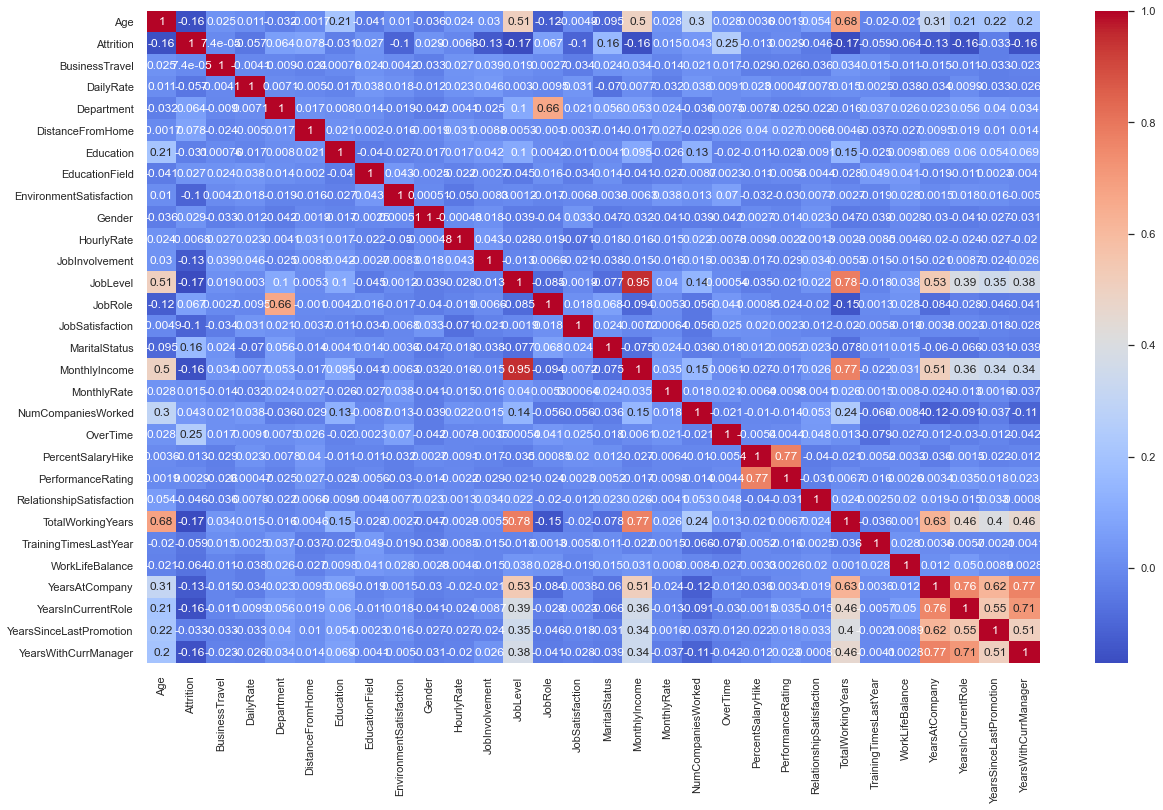

In [92]:
## Correlation matrix
corrmat = hr_df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

In [93]:
## Printing the Correlation for income field 
corrmat['Attrition'].sort_values(ascending = False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
Y

##### Observation

1. The target variable "Attrition" is positively correlated with "Overtime", "MaritalStatus", "DistanceFromHome", "JobRole", "NumberOfCompaniesWorked", "Gender", "EducationField", "MonthlyRate", "PerformanceRating"

2. The target variable is negatively correlated with "TotalWorkingYears", "JobLevel", "YearsInCurrentRole", "MonthlyIncome", "Age", "YearsAtCompany", "YearsWithCurrManager"

3. The above correlation is completely make sense as Attrition rate would be higher if people are asked to work overtime or performance rating is poor or Monthly rate is less compared to others. Negative correlation also makes sense for below reasons. 
    - Experienced people wouldn't willing to move out of the company; 
    - People with high job role also wouldn't be interested to change the company often; 
    - People earning more monthly income would also be interested to stay in the current company
    - People with more number of years in the current company or Older people also willing to stay in the current company

### Handling Class Imbalance

<AxesSubplot:xlabel='Attrition', ylabel='count'>

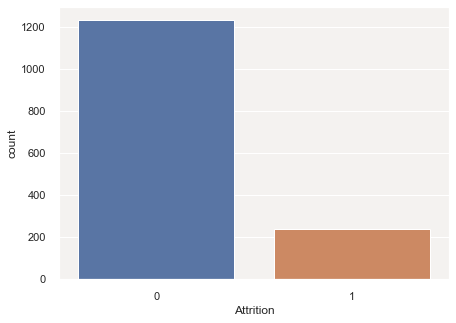

In [94]:
## Plotting sns counter plot for target variable "Attrition"
plt.figure(figsize =(7 ,5))
sns.countplot(hr_df['Attrition'])

##### Observation

About 84 % of data are of class label 0 and only 16 % of data are of class label 1.
This creates Class Imbalance.
It is necessary to remove because even if we create a classifier which everytime predicts Attrition as 'No' will also achieve an overall accuracy of 84%, which is meaningless.

#### SMOTE

##### SPLITTING DATASET INTO FEATURES -> X AND TARGET -> Y

In [103]:
## Splitting the dataset into features and target
X = hr_df.drop('Attrition' ,axis =1)
y = hr_df['Attrition']

print(X.shape ,y.shape)

(1470, 29) (1470,)


In [104]:
## Applying SMOTE to the dataset
smote = SMOTE(sampling_strategy='minority')
X_smote ,y_smote = smote.fit_resample(X ,y)

print(X_smote.shape ,y_smote.shape)

(2466, 29) (2466,)


<AxesSubplot:xlabel='Attrition', ylabel='count'>

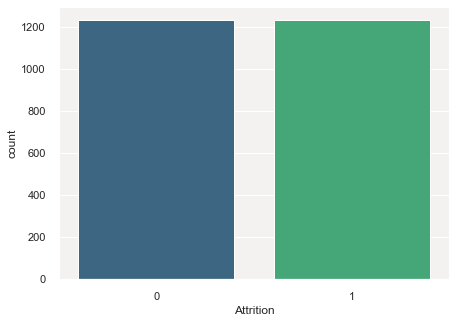

In [105]:
#Showing Balanced dataset
plt.figure(figsize =(7 ,5))
y.value_counts()
sns.countplot(y_smote ,palette='viridis')

Now we could see the target variable is balanced between 1 and 0; Attrition: Yes and No

## Modeling

#### Logistic Regression

##### Running Logistic Regression on the dataset with all the features

In [46]:
## Declare a list variable to store all the results
model_result = {}

In [47]:
## Splitting the dataframe in train and test
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.30, random_state = 42)

In [48]:
## Priting values from X_Train dataframe
X_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
71,29,2,1328,1,2,3,1,3,1,76,3,1,6,2,1,2703,4956,0,0,23,4,4,6,3,3,5,4,0,4
1204,48,1,708,2,7,2,3,4,0,95,3,1,8,3,1,2655,11740,2,1,11,3,3,19,3,3,9,7,7,7
1752,29,2,538,1,21,3,1,1,0,89,2,1,2,3,2,2750,18074,1,1,21,3,2,1,2,1,1,0,0,0
63,59,2,1435,2,25,3,1,1,0,99,3,3,7,1,2,7637,2354,7,0,11,3,4,28,3,2,21,16,7,9
2361,33,1,972,1,4,3,1,2,0,55,1,1,4,4,0,2616,17540,2,1,13,3,2,7,1,2,5,5,0,0


In [49]:
## Printing the shape of train and test dataset
print("The shape of training dataset: {}".format(X_train.shape))
print("The shape of test dataset: {}".format(X_test.shape))

The shape of training dataset: (1726, 29)
The shape of test dataset: (740, 29)


##### Without StandardScalar

##### Logistic Regression

In [50]:
## Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, model.predict(X_train))
print('Logistic Regression score for train data:', train_acc * 100)
print('Logistic Regression score for test data:', acc * 100)
print('Classification Report')
print(cr(y_test, y_pred))
print('Confusion Matrix')
print(cm(y_test, y_pred))
model_result['LR_WO_SS'] = "{:.4f}".format(acc)
print('Printing Model Result Variable: {}'.format(model_result))

Logistic Regression score for train data: 68.82966396292005
Logistic Regression score for test data: 65.27027027027027
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.64      0.65       369
           1       0.65      0.66      0.66       371

    accuracy                           0.65       740
   macro avg       0.65      0.65      0.65       740
weighted avg       0.65      0.65      0.65       740

Confusion Matrix
[[237 132]
 [125 246]]
Printing Model Result Variable: {'LR_WO_SS': '0.6527'}


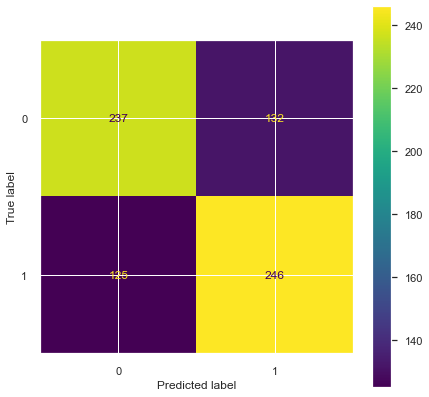

In [51]:
## Confusion Matrix Plot
## Plotting the confusion Matrix
## Reference: https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(model, X_test, y_test, ax=ax)  

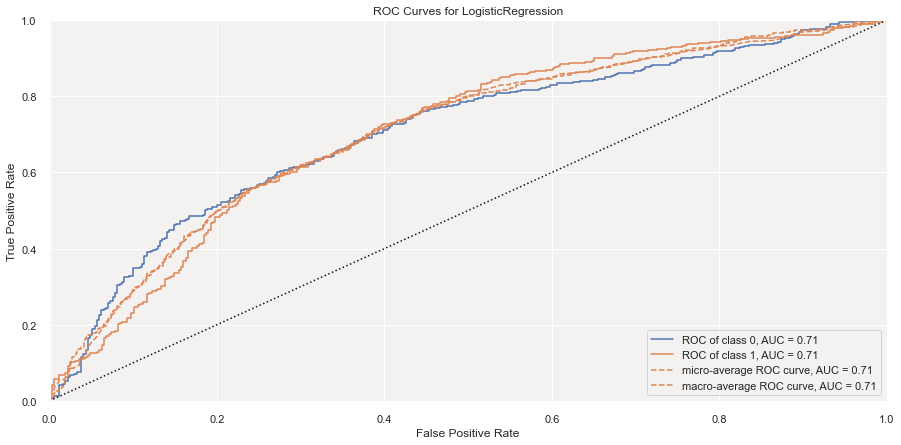

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [52]:
# ROC and AUC
#Instantiate the visualizer
plt.rcParams['figure.figsize'] = (15, 7)
roc_curve = ROCAUC(model, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test, y_test)
#evaluate the model on the test data
roc_curve.score(X_test, y_test)  
roc_curve.show()

##### Decision Tree

In [53]:
## Decision Tree Classifier Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, classifier.predict(X_train))
print(' Regression score for train data:', train_acc * 100)
print('Logistic Regression score for test data:', acc * 100)
print('Classification Report')
print(cr(y_test, y_pred))
print('Confusion Matrix')
cm_result = cm(y_test, y_pred)
print(cm(y_test, y_pred))
model_result['DT_WO_SS'] = "{:.4f}".format(acc)
print('Printing Model Result Variable: {}'.format(model_result))

 Regression score for train data: 100.0
Logistic Regression score for test data: 82.16216216216216
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       369
           1       0.81      0.85      0.83       371

    accuracy                           0.82       740
   macro avg       0.82      0.82      0.82       740
weighted avg       0.82      0.82      0.82       740

Confusion Matrix
[[294  75]
 [ 57 314]]
Printing Model Result Variable: {'LR_WO_SS': '0.6527', 'DT_WO_SS': '0.8216'}


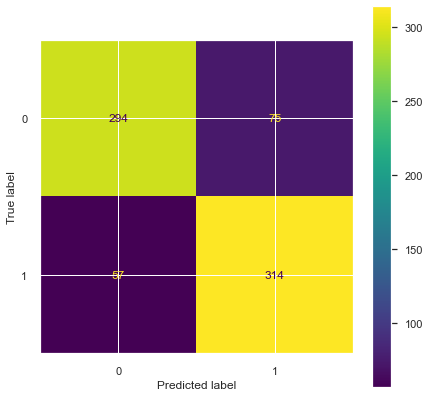

In [54]:
## Confusion Matrix Plot
## Plotting the confusion Matrix
## Reference: https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(classifier, X_test, y_test, ax=ax)  

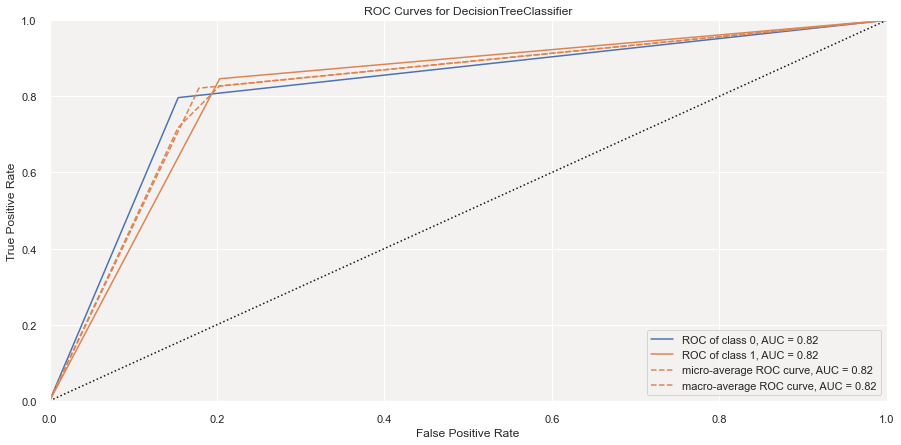

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [55]:
# ROC and AUC
#Instantiate the visualizer
plt.rcParams['figure.figsize'] = (15, 7)
roc_curve = ROCAUC(classifier, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test, y_test)
#evaluate the model on the test data
roc_curve.score(X_test, y_test)  
roc_curve.show()

###### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, classifier.predict(X_train))
print('Logistic Regression score for train data:', train_acc * 100)
print('Logistic Regression score for test data:', acc * 100)
print('Classification Report')
print(cr(y_test, y_pred))
print("Confusion Matrix")
cm_result = cm(y_test, y_pred)
print(cm(y_test, y_pred))
model_result['RF_WO_SS'] = "{:.4f}".format(acc)
print('Printing Model Result Variable: {}'.format(model_result))

Logistic Regression score for train data: 100.0
Logistic Regression score for test data: 91.08108108108108
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       369
           1       0.92      0.90      0.91       371

    accuracy                           0.91       740
   macro avg       0.91      0.91      0.91       740
weighted avg       0.91      0.91      0.91       740

Confusion Matrix
[[341  28]
 [ 38 333]]
Printing Model Result Variable: {'LR_WO_SS': '0.6527', 'DT_WO_SS': '0.8216', 'RF_WO_SS': '0.9108'}


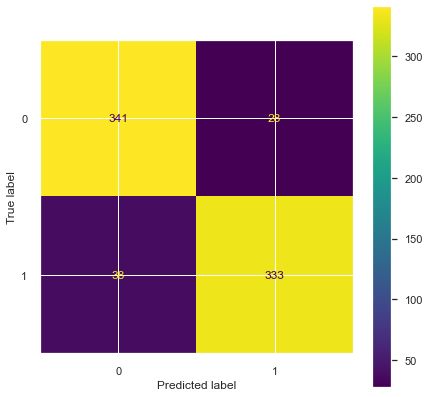

In [57]:
## Confusion Matrix Plot
## Plotting the confusion Matrix
## Reference: https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(classifier, X_test, y_test, ax=ax)  

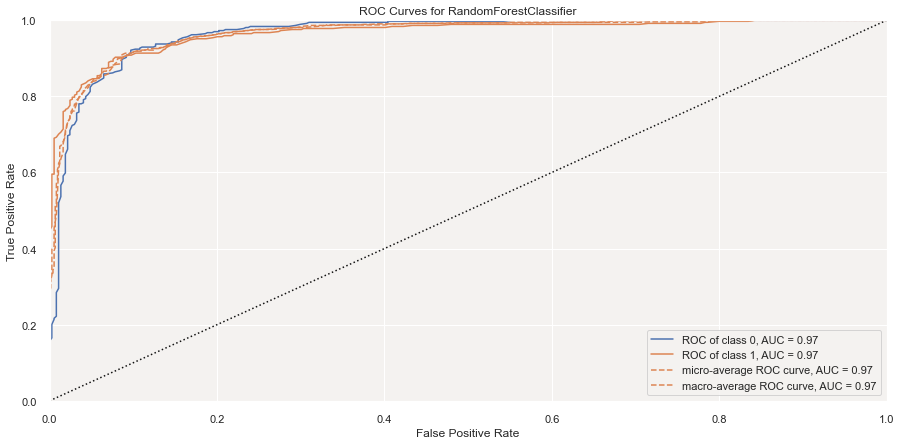

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [58]:
# ROC and AUC
#Instantiate the visualizer
plt.rcParams['figure.figsize'] = (15, 7)
roc_curve = ROCAUC(classifier, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test, y_test)
#evaluate the model on the test data
roc_curve.score(X_test, y_test)  
roc_curve.show()

#### With StandardScalar

In [59]:
## Apply standard Scalar to the dataset
sc = StandardScaler()
X_ss_train = pd.DataFrame(sc.fit_transform(X_train))
X_ss_test = pd.DataFrame(sc.transform(X_test))

In [60]:
## Printing few records from X Train dataset
X_ss_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,-0.697340,0.726839,1.469957,-0.335404,-1.008158,0.257988,-0.904595,0.500187,0.951355,0.539061,0.623207,-0.802088,0.696028,-0.424732,-0.077566,-0.699385,-1.342438,-1.121787,-0.653029,2.315856,2.939806,1.428162,-0.498756,0.349887,0.553626,-0.148375,0.170371,-0.642710,0.204427
1,1.390732,-0.779193,-0.174007,1.620366,-0.346983,-0.760975,0.723487,1.423528,-1.051132,1.548769,0.623207,-0.802088,1.559684,0.498552,-0.077566,-0.710282,-0.385231,-0.270708,1.531327,-1.166250,-0.340159,0.468268,1.219777,0.349887,0.553626,0.532277,1.057876,1.762872,1.099208
2,-0.697340,0.726839,-0.624771,-0.335404,1.504307,0.257988,-0.904595,-1.346494,-1.051132,1.229914,-0.729818,-0.802088,-1.031283,0.498552,1.346683,-0.688715,0.508482,-0.696247,1.531327,1.735505,-0.340159,-0.491626,-1.159730,-0.467305,-2.161029,-0.829028,-1.012970,-0.642710,-0.988613
3,2.599616,0.726839,1.753673,1.620366,2.033248,0.257988,-0.904595,-1.346494,-1.051132,1.761339,0.623207,1.096958,1.127856,-1.348017,1.346683,0.420743,-1.709574,1.856988,-0.653029,-1.166250,-0.340159,1.428162,2.409531,0.349887,-0.803702,2.574235,3.720393,1.762872,1.695728
4,-0.257746,-0.779193,0.526003,-0.335404,-0.743688,0.257988,-0.904595,-0.423153,-1.051132,-0.576932,-2.082843,-0.802088,-0.167627,1.421837,-1.501816,-0.719136,0.433136,-0.270708,1.531327,-0.585899,-0.340159,-0.491626,-0.366561,-1.284498,-0.803702,-0.148375,0.466206,-0.642710,-0.988613


###### Logistic Regression

In [61]:
## Logistic Regression
model = LogisticRegression()
model.fit(X_ss_train, y_train)

y_pred = model.predict(X_ss_test)
acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, model.predict(X_ss_train))
print('Logistic Regression score for train data:', train_acc * 100)
print('Logistic Regression score for test data:', acc * 100)
print('Classification Report')
print(cr(y_test, y_pred))
print('Confusion Matrix')
print(cm(y_test, y_pred))
model_result['LR_SS'] = "{:.4f}".format(acc)
print('Printing Model Result Variable: {}'.format(model_result))

Logistic Regression score for train data: 82.09733487833141
Logistic Regression score for test data: 81.62162162162161
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       369
           1       0.82      0.81      0.82       371

    accuracy                           0.82       740
   macro avg       0.82      0.82      0.82       740
weighted avg       0.82      0.82      0.82       740

Confusion Matrix
[[302  67]
 [ 69 302]]
Printing Model Result Variable: {'LR_WO_SS': '0.6527', 'DT_WO_SS': '0.8216', 'RF_WO_SS': '0.9108', 'LR_SS': '0.8162'}


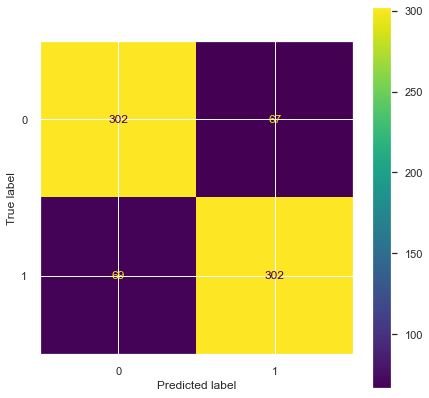

In [62]:
## Confusion Matrix Plot
## Plotting the confusion Matrix
## Reference: https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(model, X_ss_test, y_test, ax=ax) 

#### Decision Tree

In [63]:
## Decision Tree Classifier Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_ss_train, y_train)

y_pred = classifier.predict(X_ss_test)
acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, classifier.predict(X_ss_train))
print('Logistic Regression score for train data:', train_acc * 100)
print('Logistic Regression score for test data:', acc * 100)
print('Classification Report')
print(cr(y_test, y_pred))
print('Confusion Matrix')
print(cm(y_test, y_pred))
model_result['DT_SS'] = "{:.4f}".format(acc)
print('Printing Model Result Variable: {}'.format(model_result))

Logistic Regression score for train data: 100.0
Logistic Regression score for test data: 82.16216216216216
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       369
           1       0.81      0.85      0.83       371

    accuracy                           0.82       740
   macro avg       0.82      0.82      0.82       740
weighted avg       0.82      0.82      0.82       740

Confusion Matrix
[[294  75]
 [ 57 314]]
Printing Model Result Variable: {'LR_WO_SS': '0.6527', 'DT_WO_SS': '0.8216', 'RF_WO_SS': '0.9108', 'LR_SS': '0.8162', 'DT_SS': '0.8216'}


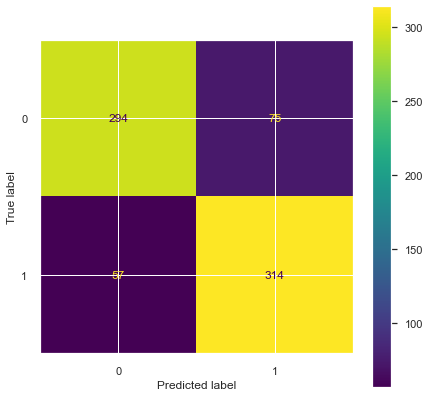

In [64]:
## Confusion Matrix Plot
## Plotting the confusion Matrix
## Reference: https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(classifier, X_ss_test, y_test, ax=ax)  

##### Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_ss_train, y_train)

y_pred = classifier.predict(X_ss_test)
acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, classifier.predict(X_ss_train))
print('Random Forest score for train data:', train_acc * 100)
print('Random Forest score for test data:', acc * 100)
print('Classification Report')
print(cr(y_test, y_pred))
print("Confusion Matrix")
cm_result = cm(y_test, y_pred)
print(cm(y_test, y_pred))
model_result['RF_SS'] = "{:.4f}".format(acc)
print('Printing Model Result Variable: {}'.format(model_result))

Random Forest score for train data: 100.0
Random Forest score for test data: 90.81081081081082
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       369
           1       0.92      0.89      0.91       371

    accuracy                           0.91       740
   macro avg       0.91      0.91      0.91       740
weighted avg       0.91      0.91      0.91       740

Confusion Matrix
[[341  28]
 [ 40 331]]
Printing Model Result Variable: {'LR_WO_SS': '0.6527', 'DT_WO_SS': '0.8216', 'RF_WO_SS': '0.9108', 'LR_SS': '0.8162', 'DT_SS': '0.8216', 'RF_SS': '0.9081'}


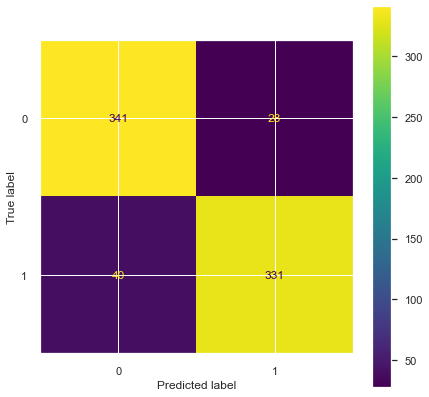

In [66]:
## Confusion Matrix Plot
## Plotting the confusion Matrix
## Reference: https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(classifier, X_ss_test, y_test, ax=ax)  

##### Modeling Results

In [67]:
## Printing the modeling results
mapping = {'LR_WO_SS':'Logistic Regression without Standard Scalar',
          'DT_WO_SS':'Decision Tree without Standard Scalar',
          'RF_WO_SS':'Random Forest without Standard Scalar',
          'LR_SS': 'Logistic Regression with Standard Scalar',
          'DT_SS':'Decision Tree Standard Scalar',
          'RF_SS':'Random Forest Standard Scalar'
          }
for k, v in model_result.items():
    print("The score for {}: {}".format(mapping[k],v))
    

The score for Logistic Regression without Standard Scalar: 0.6527
The score for Decision Tree without Standard Scalar: 0.8216
The score for Random Forest without Standard Scalar: 0.9108
The score for Logistic Regression with Standard Scalar: 0.8162
The score for Decision Tree Standard Scalar: 0.8216
The score for Random Forest Standard Scalar: 0.9081


[0.6527, 0.8216, 0.9108, 0.8162, 0.8216, 0.9081]
['LR_WO_SS', 'DT_WO_SS', 'RF_WO_SS', 'LR_SS', 'DT_SS', 'RF_SS']


Text(0.5, 0, 'Accuracy')

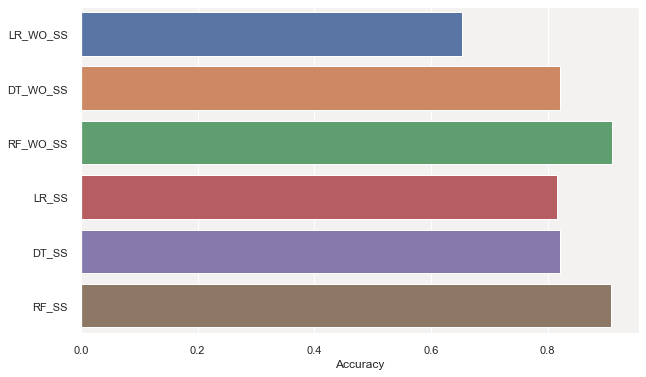

In [68]:
## Plotting the scores
plt.rcParams['figure.figsize'] = (10, 6)
x_axis = []
y_axis = []
for k, v in model_result.items():
    x_axis.append(float(v))
    y_axis.append(k)
print(x_axis)
print(y_axis)
sns.barplot(x=x_axis,y=y_axis)
plt.xlabel('Accuracy')

#### Use X2 to find the 5 best features in the dataset and run the Logistic Regression, Decision Tree and Random Forest Classifier again

In [95]:
# Load libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [96]:
## Correlation matrix
X_data = hr_df.drop('Attrition', axis=1)
y_data = hr_df['Attrition']

In [97]:
print("Shape of source variables: {}".format(X_data.shape))
print("Shape of target variable: {}".format(y_data.shape))

Shape of source variables: (1470, 29)
Shape of target variable: (1470,)


In [98]:
## Splitting the dataframe in train and test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.30, random_state = 42)

In [99]:
# Create target and feature_names list
features = X_train
target = y_train

In [100]:
# Select 5 features with highest chi-squared statistics
chi2_selector=SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(features, target)

In [101]:
# Show results
print ("Original number of features:", features.shape[1])
print ("Reduced number of features:", features_kbest.shape[1])

Original number of features: 29
Reduced number of features: 5


In [69]:
## Splitting the dataframe in train and test
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.30, random_state = 42)

In [102]:
# Get columns to keep and create new dataframe with those only
cols = chi2_selector.get_support(indices=True)
features_df_new = features.iloc[:,cols]
features_df_new

,DailyRate,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole
714,1126,17399,32,5,4
135,216,4941,7,3,2
1271,337,2679,1,1,0
477,1246,18200,32,32,5
806,994,10445,18,8,6
...,...,...,...,...,...
1130,750,3407,10,10,9
1294,447,6870,11,3,2
860,1256,2853,1,0,0
1459,1378,4025,10,4,3


#### Best features on SMOTE dataset

In [106]:
# Create target and feature_names list
features = X_smote
target = y_smote

In [107]:
# Select 5 features with highest chi-squared statistics
chi2_selector=SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(features, target)

In [108]:
# Show results
print ("Original number of features:", features.shape[1])
print ("Reduced number of features:", features_kbest.shape[1])

Original number of features: 29
Reduced number of features: 5


In [109]:
# Get columns to keep and create new dataframe with those only
cols = chi2_selector.get_support(indices=True)
features_df_new = features.iloc[:,cols]
features_df_new

,DailyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
0,1102,5993,19479,8,6
1,279,5130,24907,10,10
2,1373,2090,2396,7,0
3,1392,2909,23159,8,8
4,591,3468,16632,6,2
...,...,...,...,...,...
2461,350,1842,26735,0,0
2462,371,2141,15196,4,2
2463,737,2834,6392,4,3
2464,268,5057,5898,10,7


In [75]:
##split the data into a training and test set with top 5 features
X_chi = X_smote[['DailyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany']]
#get the target
y_chi = y_smote

In [76]:
#split the data into training and test sets (80% Training/20% Test)
X_train_chi, X_test_chi, y_train_chi, y_test_chi = train_test_split(X_chi, y_chi, test_size = 0.3)

In [77]:
#reset indices in the training and test sets to prevent pandas slicing warnings
X_train_chi = X_train_chi.reset_index(drop = True) #drop + True drops the previous index
X_test_chi = X_test_chi.reset_index(drop = True)
y_train_chi = y_train_chi.reset_index(drop = True)
y_test_chi = y_test_chi.reset_index(drop = True)

#### Logistic Regression

In [78]:
## Logistic Regression
model = LogisticRegression()
model.fit(X_train_chi, y_train_chi)

y_pred_chi = model.predict(X_test_chi)
acc_chi = accuracy_score(y_test_chi, y_pred_chi)
train_acc_chi = accuracy_score(y_train_chi, model.predict(X_train_chi))
print('Logistic Regression score for train data:', train_acc_chi * 100)
print('Logistic Regression score for test data:', acc_chi * 100)
print('Classification Report')
print(cr(y_test_chi, y_pred_chi))
print('Confusion Matrix')
print(cm(y_test_chi, y_pred_chi))
model_result['LR_TOP5'] = "{:.4f}".format(acc_chi)
print('Printing Model Result Variable: {}'.format(model_result))

Logistic Regression score for train data: 61.64542294322132
Logistic Regression score for test data: 65.54054054054053
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       363
           1       0.68      0.62      0.65       377

    accuracy                           0.66       740
   macro avg       0.66      0.66      0.66       740
weighted avg       0.66      0.66      0.66       740

Confusion Matrix
[[251 112]
 [143 234]]
Printing Model Result Variable: {'LR_WO_SS': '0.6527', 'DT_WO_SS': '0.8216', 'RF_WO_SS': '0.9108', 'LR_SS': '0.8162', 'DT_SS': '0.8216', 'RF_SS': '0.9081', 'LR_TOP5': '0.6554'}


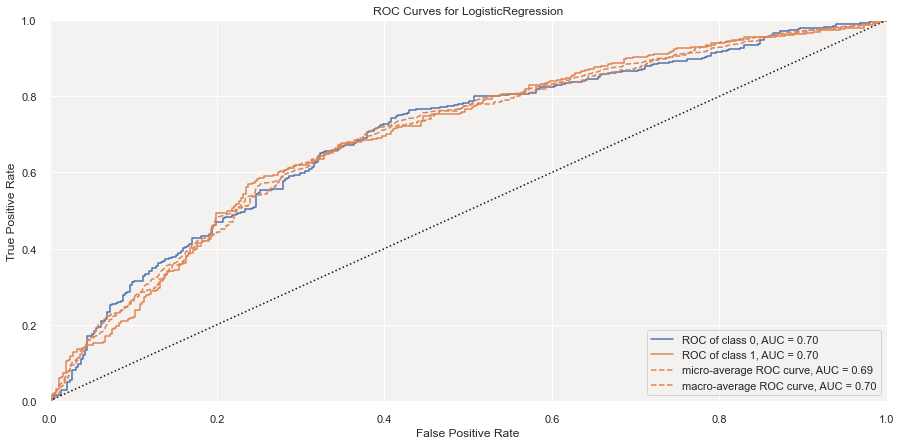

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [79]:
# ROC and AUC
#Instantiate the visualizer
plt.rcParams['figure.figsize'] = (15, 7)
roc_curve = ROCAUC(model, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test_chi, y_test_chi)
#evaluate the model on the test data
roc_curve.score(X_test_chi, y_test_chi)  
roc_curve.show()

#### Decision Tree

In [80]:
## Decision Tree Classifier Algorithm
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_chi, y_train_chi)

y_pred_chi = classifier.predict(X_test_chi)
acc_chi = accuracy_score(y_test_chi, y_pred_chi)
train_acc_chi = accuracy_score(y_train_chi, classifier.predict(X_train_chi))
print('Decision Tree score for train data:', train_acc_chi * 100)
print('Decision Tree score for test data:', acc_chi * 100)
print('Classification Report')
print(cr(y_test_chi, y_pred_chi))
print('Confusion Matrix')
print(cm(y_test_chi, y_pred_chi))
model_result['DT_TOP5'] = "{:.4f}".format(acc_chi)
print('Printing Model Result Variable: {}'.format(model_result))

Decision Tree score for train data: 100.0
Decision Tree score for test data: 72.83783783783784
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       363
           1       0.72      0.77      0.74       377

    accuracy                           0.73       740
   macro avg       0.73      0.73      0.73       740
weighted avg       0.73      0.73      0.73       740

Confusion Matrix
[[248 115]
 [ 86 291]]
Printing Model Result Variable: {'LR_WO_SS': '0.6527', 'DT_WO_SS': '0.8216', 'RF_WO_SS': '0.9108', 'LR_SS': '0.8162', 'DT_SS': '0.8216', 'RF_SS': '0.9081', 'LR_TOP5': '0.6554', 'DT_TOP5': '0.7284'}


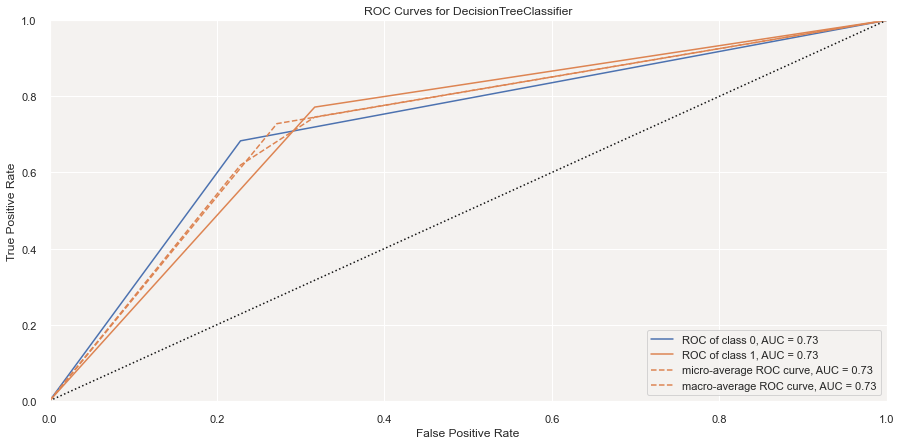

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [81]:
# ROC and AUC
#Instantiate the visualizer
plt.rcParams['figure.figsize'] = (15, 7)
roc_curve = ROCAUC(classifier, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test_chi, y_test_chi)
#evaluate the model on the test data
roc_curve.score(X_test_chi, y_test_chi)  
roc_curve.show()

#### Random Forest

In [82]:
## Decision Tree Classifier Algorithm
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_chi, y_train_chi)

y_pred_chi = classifier.predict(X_test_chi)
acc_chi = accuracy_score(y_test_chi, y_pred_chi)
train_acc_chi = accuracy_score(y_train_chi, classifier.predict(X_train_chi))
print('Decision Tree score for train data:', train_acc_chi * 100)
print('Decision Tree score for test data:', acc_chi * 100)
print('Classification Report')
print(cr(y_test_chi, y_pred_chi))
print('Confusion Matrix')
print(cm(y_test_chi, y_pred_chi))
model_result['RF_TOP5'] = "{:.4f}".format(acc_chi)
print('Printing Model Result Variable: {}'.format(model_result))

Decision Tree score for train data: 100.0
Decision Tree score for test data: 80.8108108108108
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.76      0.79       363
           1       0.79      0.86      0.82       377

    accuracy                           0.81       740
   macro avg       0.81      0.81      0.81       740
weighted avg       0.81      0.81      0.81       740

Confusion Matrix
[[275  88]
 [ 54 323]]
Printing Model Result Variable: {'LR_WO_SS': '0.6527', 'DT_WO_SS': '0.8216', 'RF_WO_SS': '0.9108', 'LR_SS': '0.8162', 'DT_SS': '0.8216', 'RF_SS': '0.9081', 'LR_TOP5': '0.6554', 'DT_TOP5': '0.7284', 'RF_TOP5': '0.8081'}


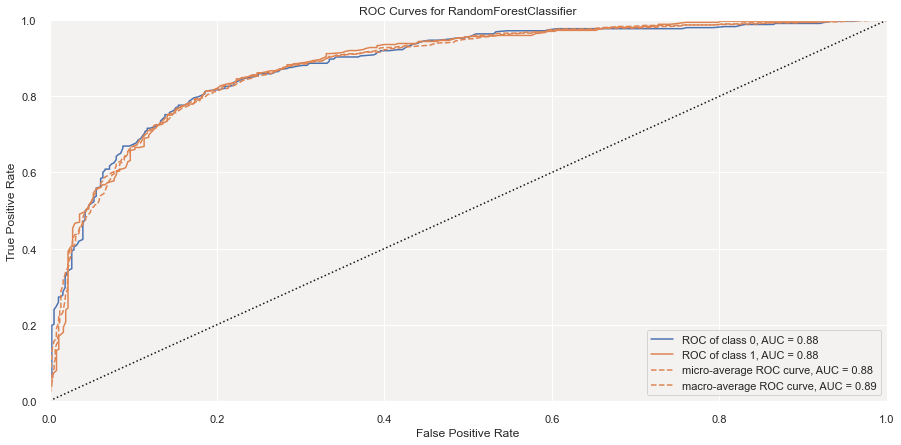

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [83]:
# ROC and AUC
#Instantiate the visualizer
plt.rcParams['figure.figsize'] = (15, 7)
roc_curve = ROCAUC(classifier, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test_chi, y_test_chi)
#evaluate the model on the test data
roc_curve.score(X_test_chi, y_test_chi)  
roc_curve.show()

#### Feature Importance of RandomForestClassifier to find top 5

In [84]:
## Splitting the dataframe in train and test
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.30, random_state = 42)

In [85]:
## Declaring classifer
rf=RandomForestClassifier(min_samples_split=30)
# Train the model using the training sets
rf.fit(X_train,y_train)
predictions_rf =rf.predict(X_test)

In [86]:
feature_importances = list(zip(X_train, rf.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];

Feature: JobSatisfaction                     Importance: 0.08744783153414576
Feature: MonthlyIncome                       Importance: 0.0730116783637982
Feature: JobInvolvement                      Importance: 0.07233785756427538
Feature: JobLevel                            Importance: 0.06785269707882143
Feature: YearsAtCompany                      Importance: 0.06661162700127087
Feature: EnvironmentSatisfaction             Importance: 0.052486305131629496
Feature: YearsWithCurrManager                Importance: 0.047734678676578116
Feature: YearsInCurrentRole                  Importance: 0.046563936001630876
Feature: DistanceFromHome                    Importance: 0.04176398124204412
Feature: TrainingTimesLastYear               Importance: 0.040908329568533415
Feature: WorkLifeBalance                     Importance: 0.037737648478719035
Feature: RelationshipSatisfaction            Importance: 0.03680354810668596
Feature: MonthlyRate                         Importance: 0.0354178190815

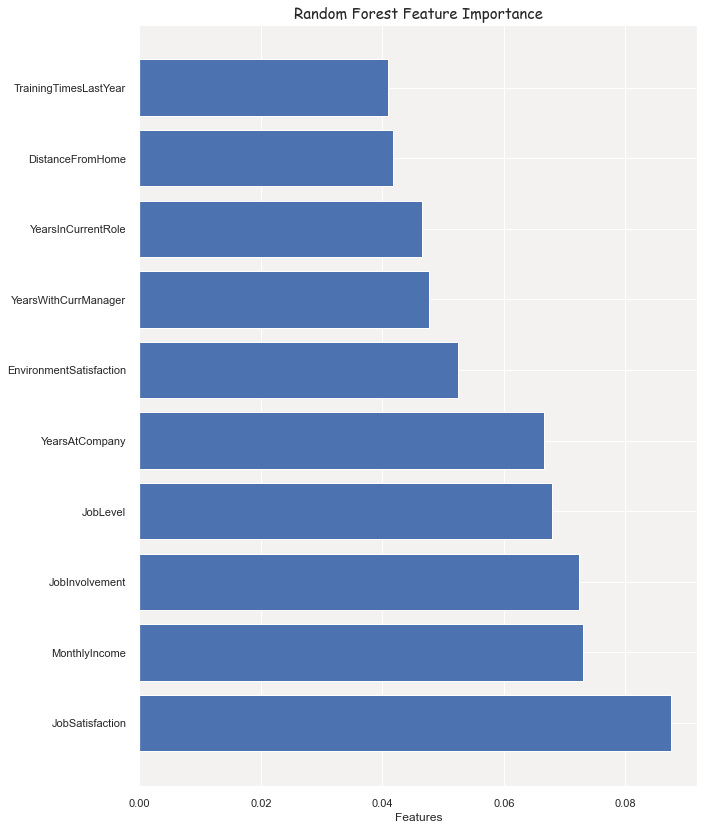

In [87]:
feature_names_10 = [i[0] for i in feature_importances_ranked[:10]]
y_ticks = np.arange(0, len(feature_names_10))
x_axis = [i[1] for i in feature_importances_ranked[:10]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_10, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 15})
plt.xlabel('Features',fontdict= {'fontsize' : 12})
plt.show()